# Market Research - The Ideal Customer

**Context**
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective ways to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

**Project Deliverables**
*Comprehensive market research report with data analysis, insights, and recommendations. Visualizations and presentations summarizing key findings.*

The classification goal is to predict if the client will subscribe to a term deposit (variable y).

**Detailed Column Descriptions**
1. id - Unique Identifier
2. target - has the client subscribed a term deposit? (binary)
3. day - last contact day of the month (numeric)
4. month - last contact month of year (categorical)
5. duration - last contact duration, in seconds (numeric)
6. contactId
7. age - client's age (numeric)
8. gender - client's gender (binary)
9. job - type of job (categorical)
10. maritalStatus - marital status (categorical)
11. education - client's highest education (categorical)
12. creditFailure - client has credit in default? (binary)
13. accountBalance -  average yearly balance (numeric)
14. house - has housing loan? (binary)
15. credit - has personal loan? (binary)
16. contactType - contact communication type (categorical)
17. numberOfContacts - number of contacts performed during this campaign and for this client (numeric, includes last contact)
18. daysSinceLastCampaign - number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
19. numberOfContactsLastCampaign - number of contacts performed before this campaign and for this client (numeric)
20. lastCampaignResult - outcome of the previous marketing campaign (categorical)

### The Problem
**Project Objective**
The model's output (a classification prediction of whether a client will subscribe to a term deposit, will be used to determine if a potential client should be contacted as part of the term deposit campaign, in order to manage company resources and focus on clients more likely to subscribe to the product.

**Current Solution**
The company usually invests in large call centers to reach out to all possible clients. This project will streamline the list of clients to the least of likely clients.

### Frame the Problem
- This is a supervised learning task, with existing target labels.
- This is a classification task, with a binary target variable.
- We'll be using a static dataset and performing batch offline learning.

### Select a Performance Measure
We'll be using accuracy, confusion matrix, ROC curve and precision/recall metrics as our performance measures.

### Check our Assumptions
- We assume that any monetary values are in USD

### Create the Workspace

In [1]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Data Preprocessing Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import silhouette_score

### Load the Data

In [2]:
train = pd.read_csv('train.csv')
df = train.copy()
df.head()

id target  day month  duration  contactId  age  gender         job   
0  432148809     no   27   may       166        623   30  female      worker  \
1  432184318     no   26   oct       183       1992   42  female     manager   
2  432182482     no    5   jun       227       2778   26  female    services   
3  432150520     no    2   jun        31       3070   34    male  unemployed   
4  432145870     no   15   may      1231       6583   48    male      worker   

  maritalStatus        education creditFailure  accountBalance house credit   
0       married       highSchool            no            -202    no     no  \
1       married     uniGraduated            no            2463    no     no   
2        single       highSchool            no            2158   yes    yes   
3      divorced     uniGraduated           yes              75   yes     no   
4       married  secondarySchool            no             559   yes     no   

  contactType  numberOfContacts  daySinceLastCampaign   
0     unknown                 2                   NaN  \
1   cellPhone                 2                   NaN   
2    landline                 1                   NaN   
3     unknown                 3                   NaN   
4     unknown                 2                   NaN   

   numberOfContactsLastCampaign lastCampaignResult  
0                             0            unknown  
1                             0            unknown  
2                             0            unknown  
3                             0            unknown  
4                             0            unknown

### Preview the Data Structure
- There are 31,480 records and 20 features in the dataset.
- Initial review has only 1 column (days since last campaign) with null values.
- There are a number of binary and categorical values that need to be encoded for the model.
- There are no duplicate values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

In [4]:
df.duplicated().sum()

0

id and contactId are unique identifiers and will be dropped in the cleaning section.

The categorical variables are:
['month', 'gender', 'job', 'maritalStatus', 'education', 'creditFailure', 'house', 'credit', 'contactType', 'lastCampaignResult']

The numeric variables are:
['day', 'duration', 'age', 'accountBalance', 'numberOfContacts', 'daysSinceLastCampaign', 'numberOfContactsLastCampaign']

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('='*35)

id
432148809    1
432178644    1
432171821    1
432156746    1
432172047    1
            ..
432152872    1
432158002    1
432174593    1
432145241    1
432171709    1
Name: count, Length: 31480, dtype: int64
target
no     27780
yes     3700
Name: count, dtype: int64
day
20    1928
18    1582
21    1426
17    1339
6     1328
5     1304
8     1285
14    1284
28    1263
7     1234
19    1232
29    1183
15    1168
12    1137
13    1108
30    1090
9     1071
4     1049
11    1038
16    1008
2      901
27     786
3      772
26     725
23     661
22     639
25     576
31     464
10     367
24     307
1      225
Name: count, dtype: int64
month
may    9514
jul    4783
aug    4334
jun    3760
nov    2781
apr    2040
feb    1887
jan     958
oct     515
sep     410
mar     348
dec     150
Name: count, dtype: int64
duration
124     144
90      129
91      127
112     127
104     126
       ... 
1541      1
1220      1
1545      1
1473      1
1628      1
Name: count, Length: 1455, dtype: int64
cont

### Data Cleaning

In [6]:
df = df.drop(columns=['id', 'contactId'])
df.head()

target  day month  duration  age  gender         job maritalStatus   
0     no   27   may       166   30  female      worker       married  \
1     no   26   oct       183   42  female     manager       married   
2     no    5   jun       227   26  female    services        single   
3     no    2   jun        31   34    male  unemployed      divorced   
4     no   15   may      1231   48    male      worker       married   

         education creditFailure  accountBalance house credit contactType   
0       highSchool            no            -202    no     no     unknown  \
1     uniGraduated            no            2463    no     no   cellPhone   
2       highSchool            no            2158   yes    yes    landline   
3     uniGraduated           yes              75   yes     no     unknown   
4  secondarySchool            no             559   yes     no     unknown   

   numberOfContacts  daySinceLastCampaign  numberOfContactsLastCampaign   
0                 2                   NaN                             0  \
1                 2                   NaN                             0   
2                 1                   NaN                             0   
3                 3                   NaN                             0   
4                 2                   NaN                             0   

  lastCampaignResult  
0            unknown  
1            unknown  
2            unknown  
3            unknown  
4            unknown

Given that this is a numeric column and the values are right skewed, we'll replace the null values to 0, reflecting clients who were not engaged in the last campaign. This will skew the dataset.

In [7]:
df['daySinceLastCampaign'].describe()

count    5738.000000
mean      225.272395
std       116.488328
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: daySinceLastCampaign, dtype: float64

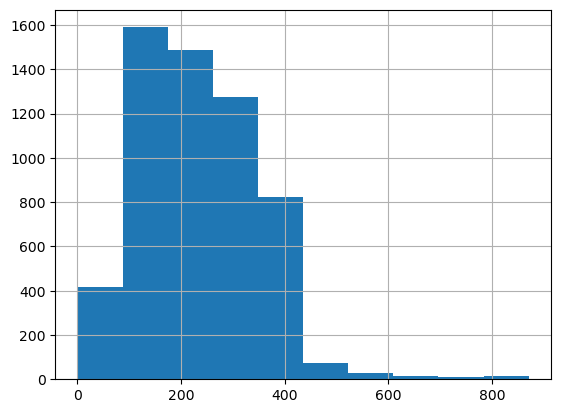

In [8]:
df['daySinceLastCampaign'].hist()
plt.show()

Is this column correlated with our target variable:

In [9]:
pd.DataFrame([df['target'].apply(lambda x : 1 if x == 'yes' else 0),
              df['daySinceLastCampaign']]).T.corr()

target  daySinceLastCampaign
target                1.000000             -0.147378
daySinceLastCampaign -0.147378              1.000000

Given the slight negative correlation that exists, we will consider filling the missing values with 0, mean and median:

In [10]:
pd.DataFrame([df['target'].apply(lambda x: 1 if x == 'yes' else 0),
              df['daySinceLastCampaign'].fillna(0)]).T.corr()

target  daySinceLastCampaign
target                1.000000              0.104058
daySinceLastCampaign  0.104058              1.000000

In [11]:
pd.DataFrame([df['target'].apply(lambda x: 1 if x == 'yes' else 0),
              df['daySinceLastCampaign'].fillna(df['daySinceLastCampaign'].mean())]).T.corr()

target  daySinceLastCampaign
target                1.000000             -0.082399
daySinceLastCampaign -0.082399              1.000000

In [12]:
pd.DataFrame([df['target'].apply(lambda x: 1 if x == 'yes' else 0),
              df['daySinceLastCampaign'].fillna(df['daySinceLastCampaign'].median())]).T.corr()

target  daySinceLastCampaign
target                1.00000              -0.04201
daySinceLastCampaign -0.04201               1.00000

From below, the best correlation occurs with a fill value of 0:

In [13]:
df['daySinceLastCampaign'].fillna(0, inplace=True)

### Exploratory Analysis

In [14]:
num_cols = ['day', 'duration', 'age', 'accountBalance',
            'numberOfContacts', 'daySinceLastCampaign', 'numberOfContactsLastCampaign']
cat_cols = ['month', 'gender', 'job', 'maritalStatus', 'education',
            'creditFailure', 'house', 'credit', 'contactType', 'lastCampaignResult']

**Univariate Analysis**

In [15]:
df[num_cols].describe()

day      duration           age  accountBalance   
count  31480.000000  31480.000000  31480.000000    31480.000000  \
mean      15.799015    258.498380     40.935737     1348.535133   
std        8.323251    256.576891     10.629198     2974.355578   
min        1.000000      0.000000     18.000000    -8019.000000   
25%        8.000000    104.000000     33.000000       70.000000   
50%       16.000000    180.000000     39.000000      442.000000   
75%       21.000000    320.000000     48.000000     1410.000000   
max       31.000000   4918.000000     95.000000    98417.000000   

       numberOfContacts  daySinceLastCampaign  numberOfContactsLastCampaign  
count      31480.000000          31480.000000                  31480.000000  
mean           2.779670             41.061404                      0.584339  
std            3.139269            100.185970                      2.469742  
min            1.000000              0.000000                      0.000000  
25%            1.000000              0.000000                      0.000000  
50%            2.000000              0.000000                      0.000000  
75%            3.000000              0.000000                      0.000000  
max           63.000000            871.000000                    275.000000

A histogram of numeric columns:

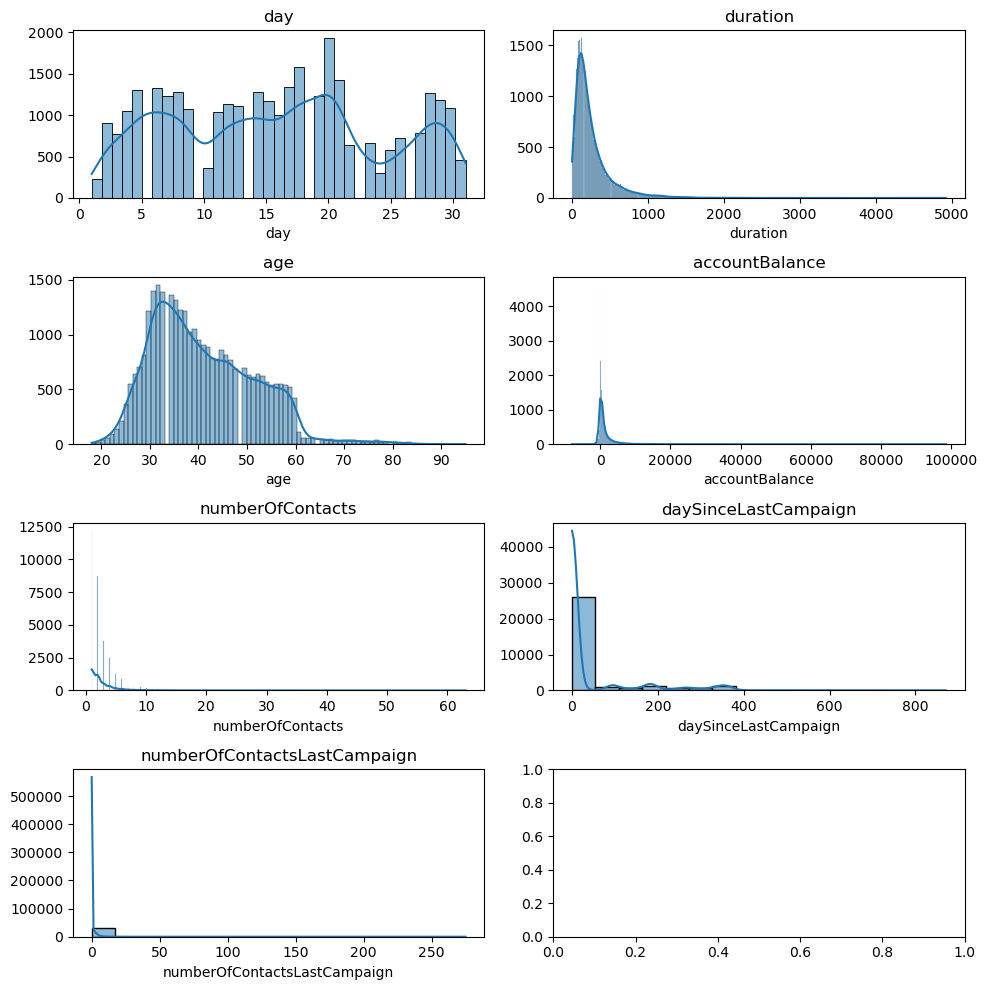

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(10,10))
for ax, col in zip(axes.ravel(), num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

Five of the numeric columns are right skewed. We'll handle the outliers in the duration and account balance columns since they have a wide range of values and fewer outliers.

**Handling Outliers**

We'll preview a boxplot of the numeric columns to see the outlier values clearer.

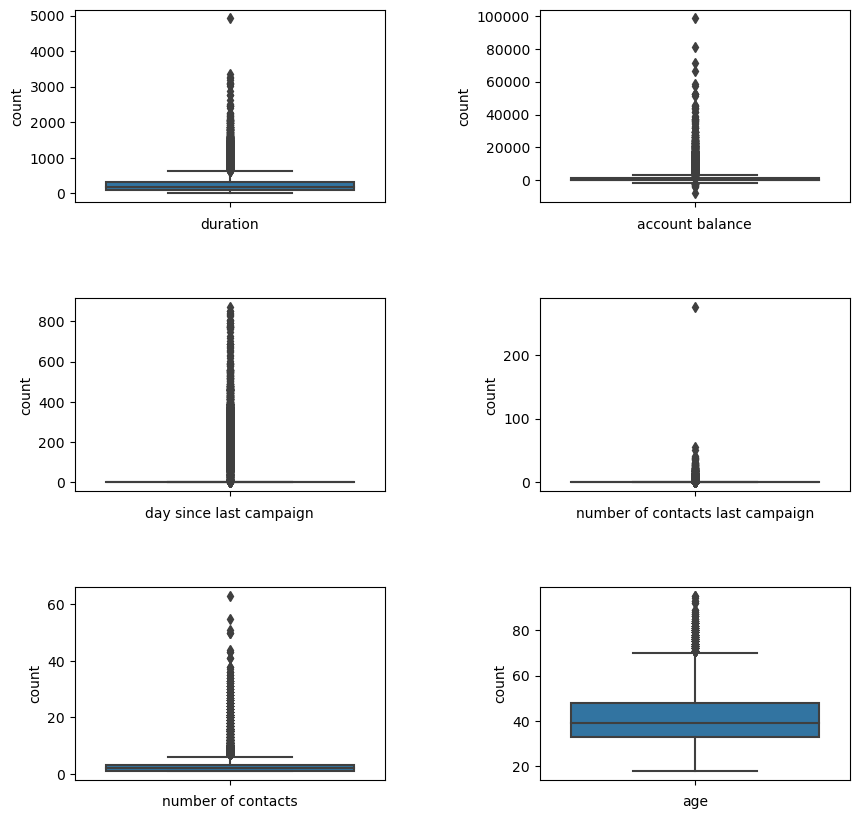

In [17]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(321)
sns.boxplot(data=df, y='duration')
plt.xlabel('duration')
plt.ylabel('count')

plt.subplot(322)
sns.boxplot(data=df, y='accountBalance')
plt.xlabel('account balance')
plt.ylabel('count')

plt.subplot(323)
sns.boxplot(data=df, y='daySinceLastCampaign')
plt.xlabel('day since last campaign')
plt.ylabel('count')

plt.subplot(324)
sns.boxplot(data=df, y='numberOfContactsLastCampaign')
plt.xlabel('number of contacts last campaign')
plt.ylabel('count')

plt.subplot(325)
sns.boxplot(data=df, y='numberOfContacts')
plt.xlabel('number of contacts')
plt.ylabel('count')

plt.subplot(326)
sns.boxplot(data=df, y='age')
plt.xlabel('age')
plt.ylabel('count')

plt.show()

There is a significant outlier over 3500 seconds. We'll review the values and correlation matrix for records below this value and the target variable:

In [18]:
df.loc[df['duration'] > 3500].shape

(1, 18)

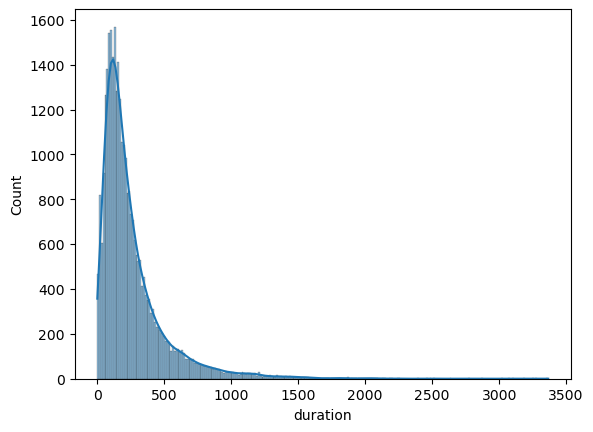

In [19]:
sns.histplot(data=df.loc[df['duration'] < 3500], x='duration', kde=True)
plt.show()

In [20]:
pd.DataFrame([df['target'].apply(lambda x : 1 if x == 'yes' else 0),
              df['duration']]).T.corr()

target  duration
target    1.000000  0.394059
duration  0.394059  1.000000

In [21]:
pd.DataFrame([df['target'].apply(lambda x : 1 if x == 'yes' else 0),
              df.loc[df['duration'] <= 3500, 'duration']]).T.corr()

target  duration
target    1.000000  0.396352
duration  0.396352  1.000000

Given the slight increase in correlation when we restrict the dataset to records with duration under 3500 seconds, we'll drop the outliers in excess of 3500 seconds:

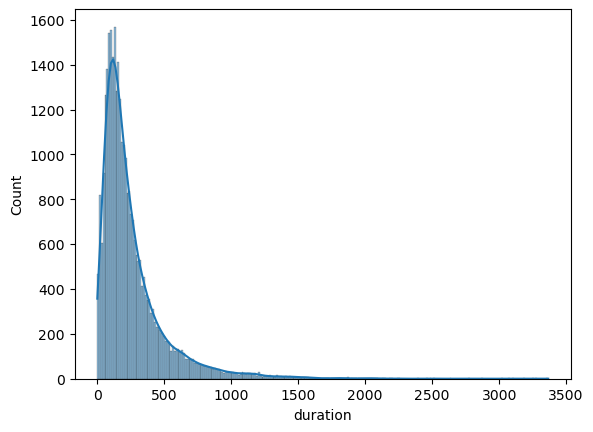

In [22]:
df.drop(index=df.loc[df['duration'] > 3500].index, inplace=True)

sns.histplot(data=df, x='duration', kde=True)
plt.show()

For the account balance field, we've identified outliers as records below -2000 and above 50000.

The outliers with account balance below -2000 did not subscribe for the target product. They are a diverse group of people across all features, but they were not part of the last campaign. It is a small sample of the dataset. We'll drop these values.

In [23]:
df.loc[df['accountBalance'].lt(-2000)]

target  day month  duration  age  gender           job maritalStatus   
2913      no    7   jul       299   26    male        worker        single  \
11196     no   18   nov       142   49  female        worker        single   
14241     no   14   jul       301   51  female       manager      divorced   
21461     no   30   may       169   49    male       manager      divorced   
25296     no   31   jul       843   40    male     technical       married   
25596     no    9   jul       120   38    male        worker      divorced   
28328     no   18   may       242   60  female       manager      divorced   
28595     no   29   may       386   43    male       manager       married   
31017     no    9   may       153   57    male  selfEmployed       married   

             education creditFailure  accountBalance house credit contactType   
2913        highSchool           yes           -8019    no    yes   cellPhone  \
11196  secondarySchool           yes           -2604   yes     no   cellPhone   
14241     uniGraduated            no           -2282   yes    yes   cellPhone   
21461     uniGraduated            no           -2049   yes     no     unknown   
25296     uniGraduated           yes           -2827   yes    yes   cellPhone   
25596       highSchool            no           -2093   yes    yes     unknown   
28328     uniGraduated            no           -4057   yes     no   cellPhone   
28595     uniGraduated           yes           -3372   yes     no     unknown   
31017     uniGraduated           yes           -3313   yes    yes     unknown   

       numberOfContacts  daySinceLastCampaign  numberOfContactsLastCampaign   
2913                  3                   0.0                             0  \
11196                 1                   0.0                             0   
14241                 6                   0.0                             0   
21461                 3                   0.0                             0   
25296                 1                   0.0                             0   
25596                 3                   0.0                             0   
28328                 6                   0.0                             0   
28595                 2                   0.0                             0   
31017                 1                   0.0                             0   

      lastCampaignResult  
2913             unknown  
11196            unknown  
14241            unknown  
21461            unknown  
25296            unknown  
25596            unknown  
28328            unknown  
28595            unknown  
31017            unknown

Outliers with account balance above 50,000 are also evenly spread across features, however, they are usually people with ages above 50. It is also a small sample of the dataset. We'll drop these values.

In [24]:
df.loc[df['accountBalance'].gt(50000)]

target  day month  duration  age  gender             job maritalStatus   
1227      no    6   oct       205   60  female         retired       married  \
6654     yes   15   feb       394   61    male    selfEmployed      divorced   
7672     yes    1   apr       390   84  female         retired       married   
8751      no    8   jul       325   56  female    entrepreneur       married   
10758     no   21   nov       319   50  female        services       married   
12809     no   14   aug       109   52    male          worker       married   
20491     no   21   aug       140   40    male         manager       married   
25144     no    7   may       144   44    male  administrative       married   
25480     no   20   nov       145   59  female         manager       married   
31162    yes   10   aug       290   61  female    selfEmployed      divorced   

             education creditFailure  accountBalance house credit contactType   
1227   secondarySchool            no           71188    no     no   cellPhone  \
6654      uniGraduated            no           52587    no     no   cellPhone   
7672        highSchool            no           81204    no     no    landline   
8751      uniGraduated            no           51439    no    yes   cellPhone   
10758       highSchool            no           57435   yes     no   cellPhone   
12809  secondarySchool            no           66653    no     no   cellPhone   
20491     uniGraduated            no           52527    no     no   cellPhone   
25144       highSchool            no           58544   yes     no     unknown   
25480     uniGraduated            no           98417    no     no    landline   
31162     uniGraduated            no           52587    no     no   cellPhone   

       numberOfContacts  daySinceLastCampaign  numberOfContactsLastCampaign   
1227                  1                   0.0                             0  \
6654                  3                 189.0                             1   
7672                  1                  94.0                             3   
8751                  1                   0.0                             0   
10758                 3                   0.0                             0   
12809                 3                   0.0                             0   
20491                11                   0.0                             0   
25144                 2                   0.0                             0   
25480                 5                   0.0                             0   
31162                 1                   0.0                             0   

      lastCampaignResult  
1227             unknown  
6654             success  
7672             success  
8751             unknown  
10758            unknown  
12809            unknown  
20491            unknown  
25144            unknown  
25480            unknown  
31162            unknown

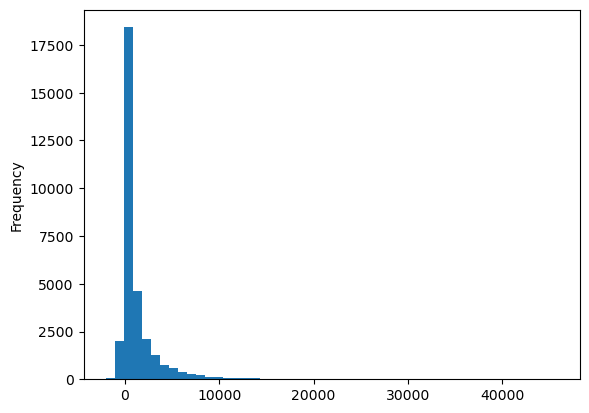

In [25]:
df.drop(index=df.loc[df['accountBalance'].lt(-2000) | df['accountBalance'].gt(50000)].index, inplace=True)
df['accountBalance'].plot.hist(bins=50)
plt.show()

for number of contacts last campaign, we've identified outliers as values above 40. We'll drop them:

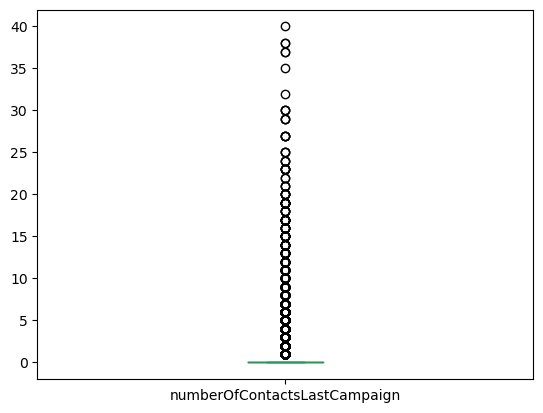

In [26]:
df.drop(index=df.loc[df['numberOfContactsLastCampaign'].gt(40)].index, inplace=True)

df['numberOfContactsLastCampaign'].plot.box()
plt.show()

We've dropped a few very extreme outlier values.

In [27]:
df.shape

(31456, 18)

Numeric columns classified by gender: *The data is evenly split along gender lines. We will confirm this in the section analyzing categorical columns. The exception is in field 'numberOfContactsLastCampaign' where the male records exceed the female records.*

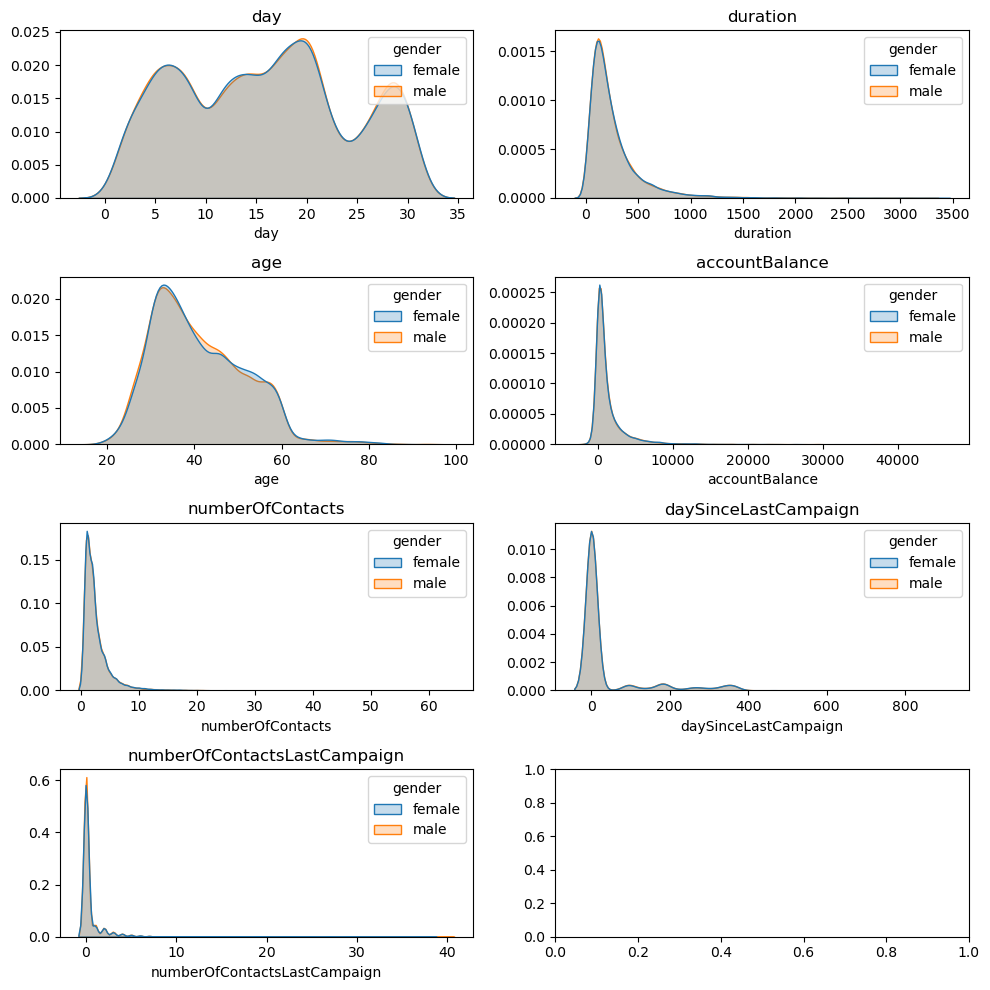

In [28]:
fig, axes = plt.subplots(4,2, figsize=(10,10))
for ax, col in zip(axes.ravel(), num_cols):
    sns.kdeplot(data=df, x=col, fill=True, hue='gender', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

Numeric columns classified by target: *Across numeric columns, the yes targets are lower than the no targets. This implies a skewed record, with more no's than yes's. The subsequent bar graph shows that only 12% of the records have a 'yes' target. This is important for modeling.*

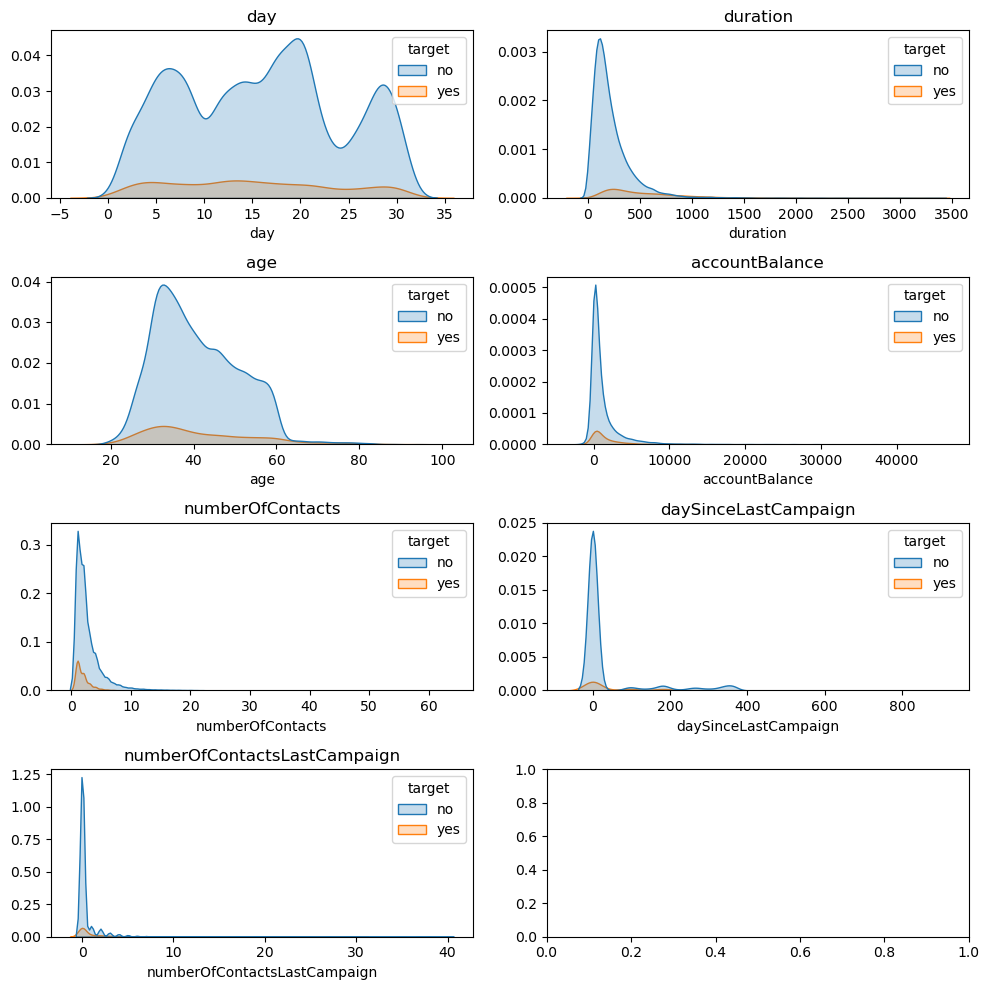

In [29]:
fig, axes = plt.subplots(4,2, figsize=(10,10))
for ax, col in zip(axes.ravel(), num_cols):
    sns.kdeplot(data=df, x=col, fill=True, hue='target', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

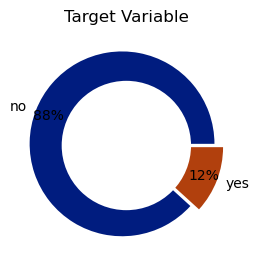

In [30]:
explode = (0.05, 0.05)

plt.figure(figsize=(3, 3))
plt.pie(df['target'].value_counts(),
        labels=df['target'].value_counts().index,
        colors=sns.color_palette('dark'),
        autopct='%.0f%%', pctdistance=0.85,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Target Variable')
plt.show()

Let's view the spread of the categorical variables. A few important points:

- Most calls were made in May
- Gender spread in the dataset is equal
- More people in the dataset are married, have a maximum high school education, have no credit defaults, have a house loan but no personal loans.
- Most records have unknown as last campaign result.

When performing correlations, we will create sub-datasets to compare how these variables correlate with the target variable.

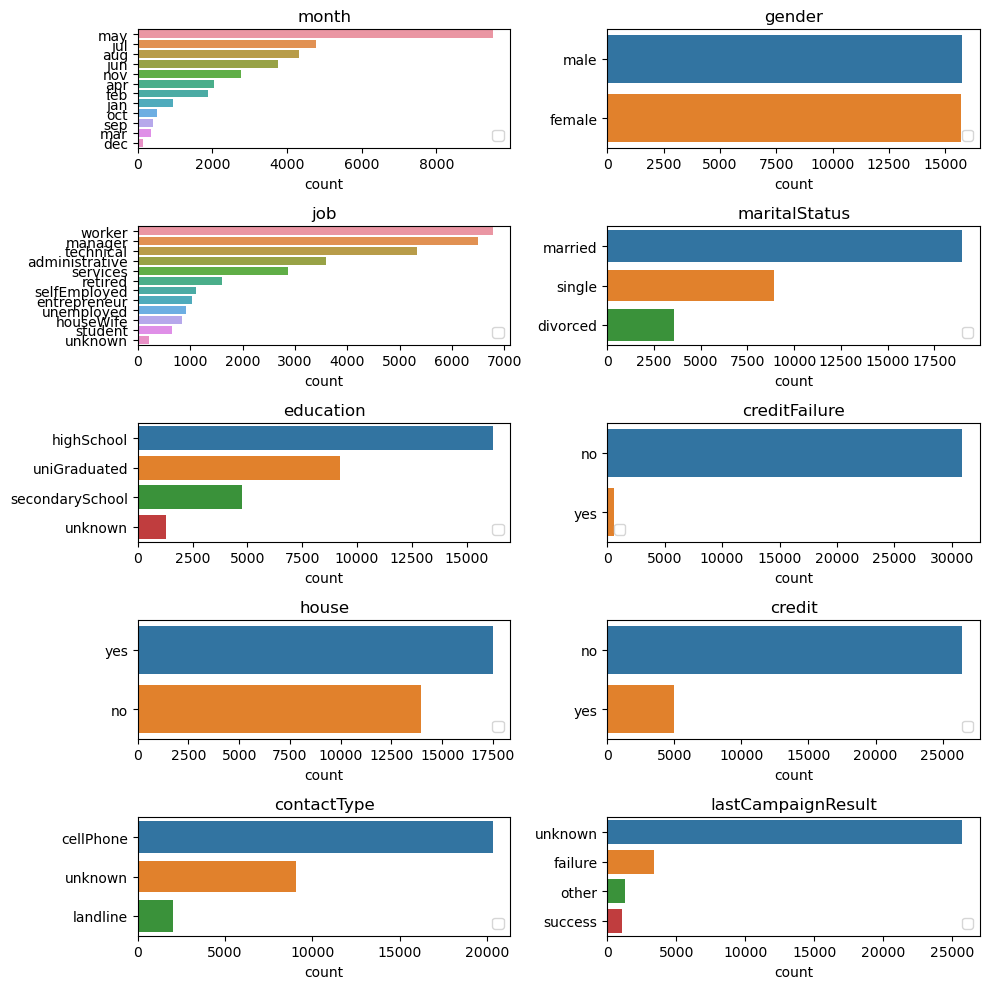

In [31]:
fig, axes = plt.subplots(5,2, figsize=(10,10))
for ax, col in zip(axes.ravel(), cat_cols):
    sns.barplot(x=df[col].value_counts(),
                y=df[col].value_counts().index,
                orient='h', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')
    ax.legend('')

fig.tight_layout()
plt.show()

**Bivariate Analysis**

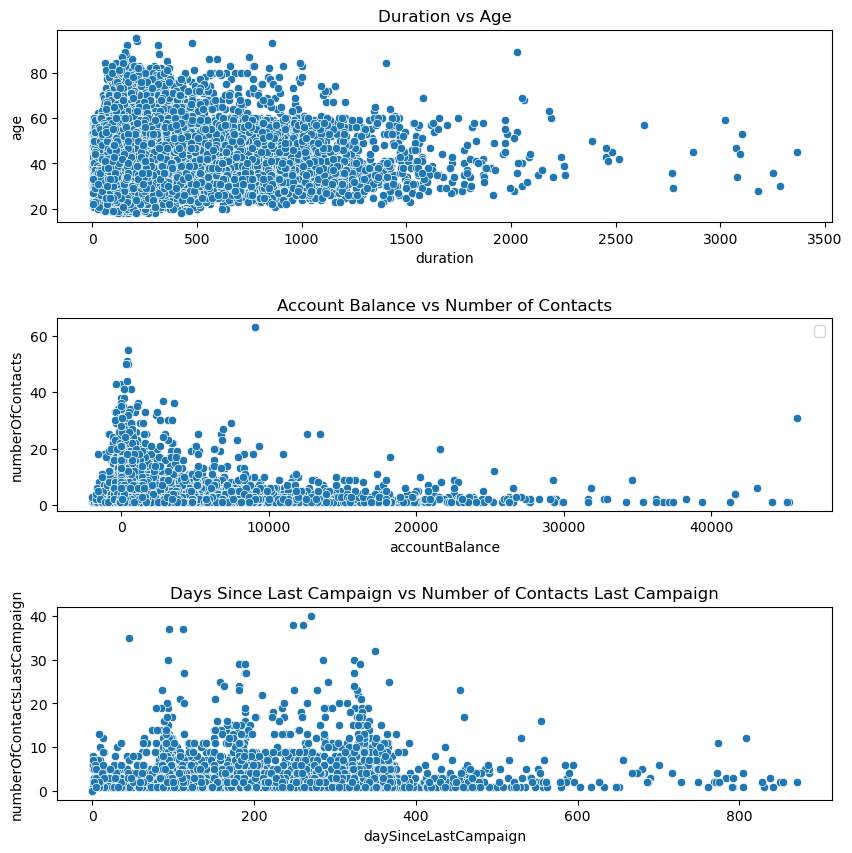

In [32]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
sns.scatterplot(data=df, x='duration', y='age')
plt.title('Duration vs Age')

plt.subplot(312)
sns.scatterplot(data=df, x='accountBalance', y='numberOfContacts')
plt.title('Account Balance vs Number of Contacts')
plt.legend('')

plt.subplot(313)
sns.scatterplot(data=df, x='daySinceLastCampaign', y='numberOfContactsLastCampaign')
plt.title('Days Since Last Campaign vs Number of Contacts Last Campaign')

plt.show()

Call duration shows a negative correlation with age. Older people are more likely to have shorter call times than younger people.

The most number of contacts where with persons with account balances around 0. As we move away from 0, the number of contacts reduces.

Records with less than 400 days since last campaign, received higher number of contacts during the last campaign. This implies that there was a change in the campaign strategy in the last year (the dataset was collected) to increase number of contacts. Records with more than 400 days since last campaign have significantly fewer number of contacts.

*Numerical Variables Classified by Target:*

Given the size of no's versus yes's in the target feature, there is no clear pattern of the target variable across all the bivariate plots.

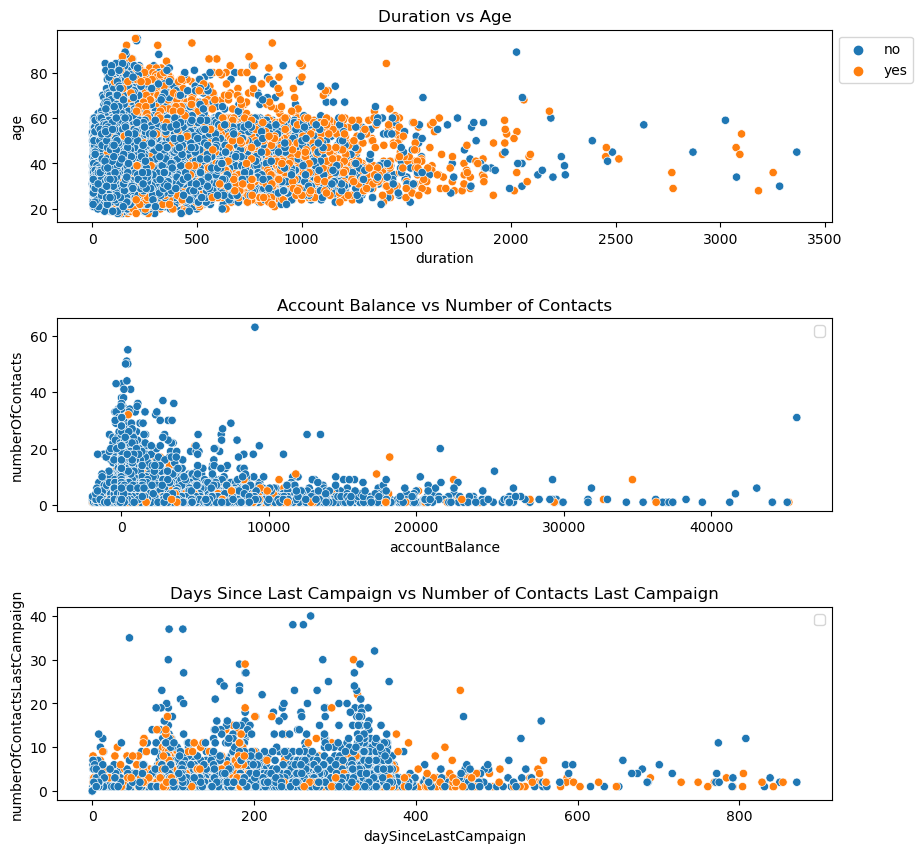

In [33]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
sns.scatterplot(data=df, x='duration', y='age', hue='target')
plt.title('Duration vs Age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.subplot(312)
sns.scatterplot(data=df, x='accountBalance', y='numberOfContacts',
                hue='target')
plt.title('Account Balance vs Number of Contacts')
plt.legend('')

plt.subplot(313)
sns.scatterplot(data=df, x='daySinceLastCampaign',
                y='numberOfContactsLastCampaign',
                hue='target')
plt.title('Days Since Last Campaign vs Number of Contacts Last Campaign')
plt.legend('')

plt.show()

Let's compare all numeric columns with 4: age, duration, account balance, number of contacts:

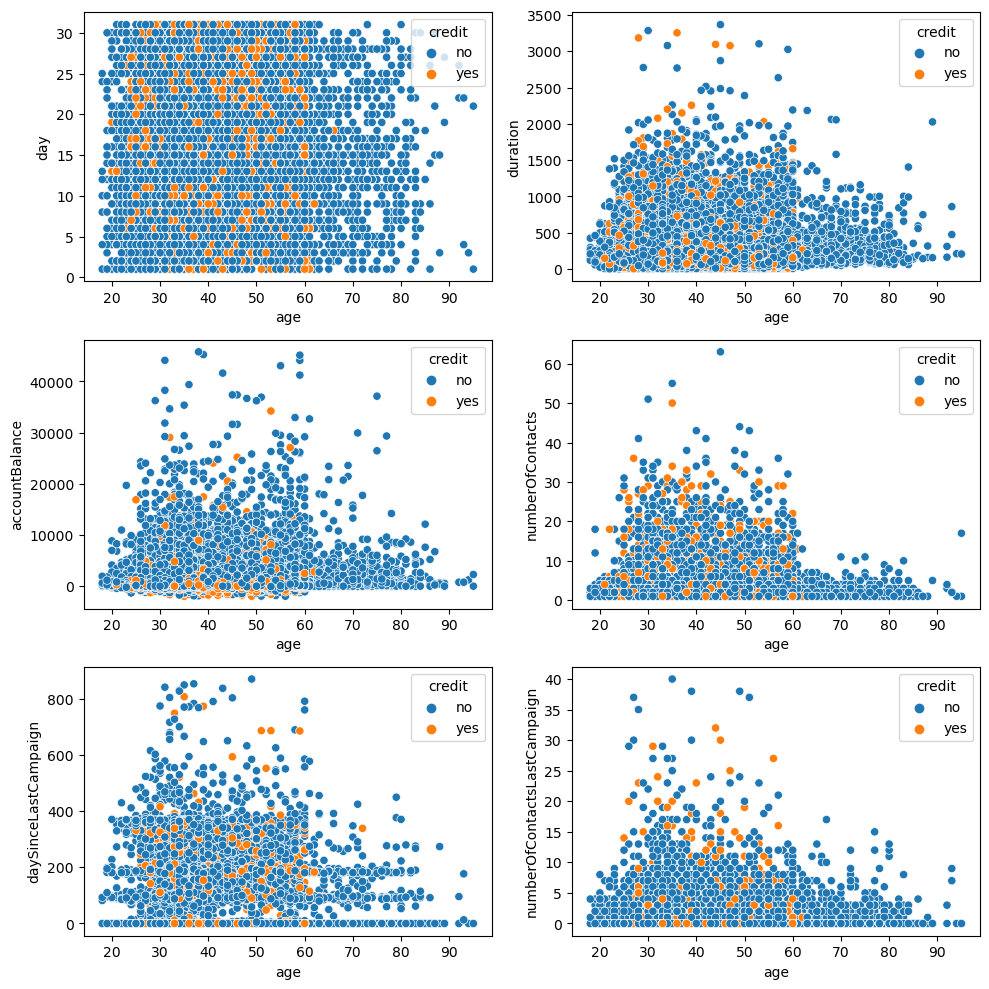

In [34]:
# Plotting Numeric columns against age
cols = [x for x in num_cols if x != 'age']

fig, axes = plt.subplots(3,2, figsize=(10,10))
for ax, col in zip(axes.ravel(), cols):
    sns.scatterplot(data=df, x='age', y=col, ax=ax, hue='credit')

fig.tight_layout()
plt.show()

On the age comparison, it seems that persons older than 60 did not subscribe to the term deposit product.

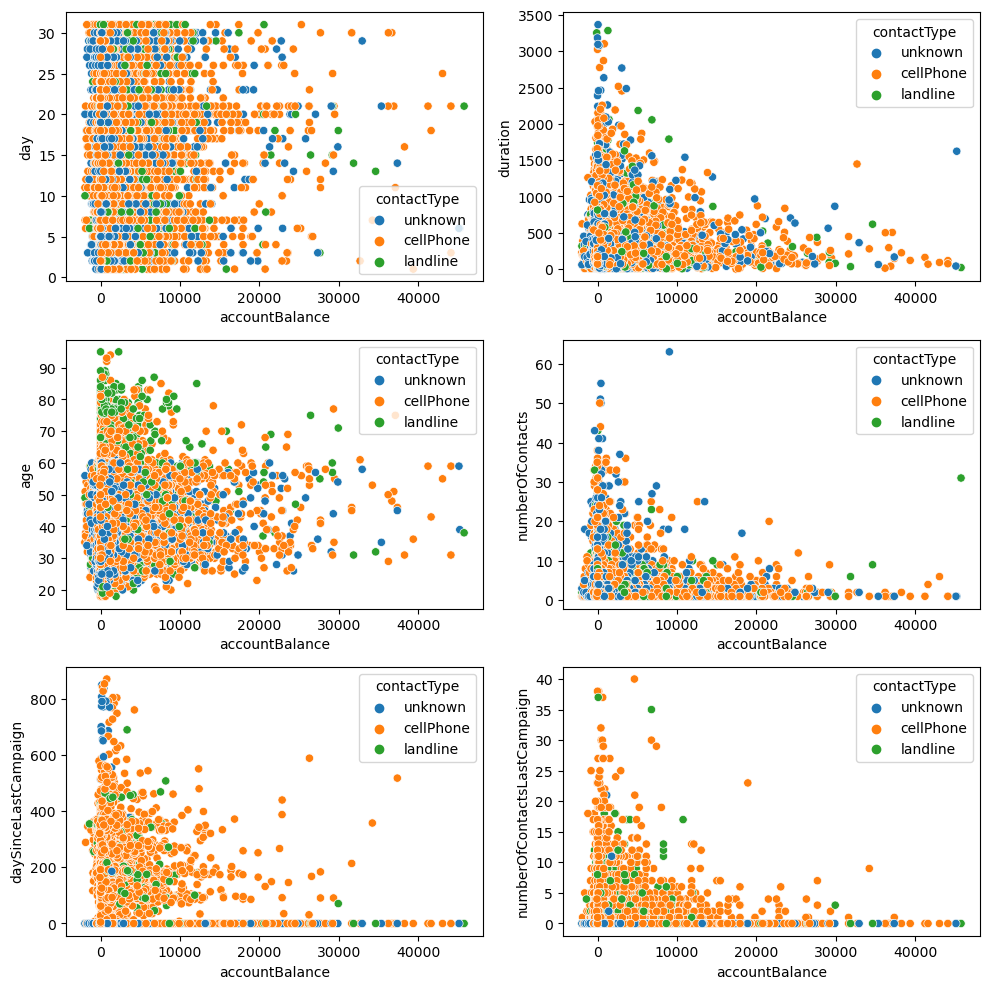

In [35]:
# Plotting Numeric columns against account balance
cols = [x for x in num_cols if x != 'accountBalance']

fig, axes = plt.subplots(3,2, figsize=(10,10))
for ax, col in zip(axes.ravel(), cols):
    sns.scatterplot(data=df, x='accountBalance', y=col, ax=ax, hue='contactType')

fig.tight_layout()
plt.show()

More people were contacted via cell phone, however, older people were mostly contacted using landlines. Persons with higher account balances were contacted less frequently and for shorter durations.

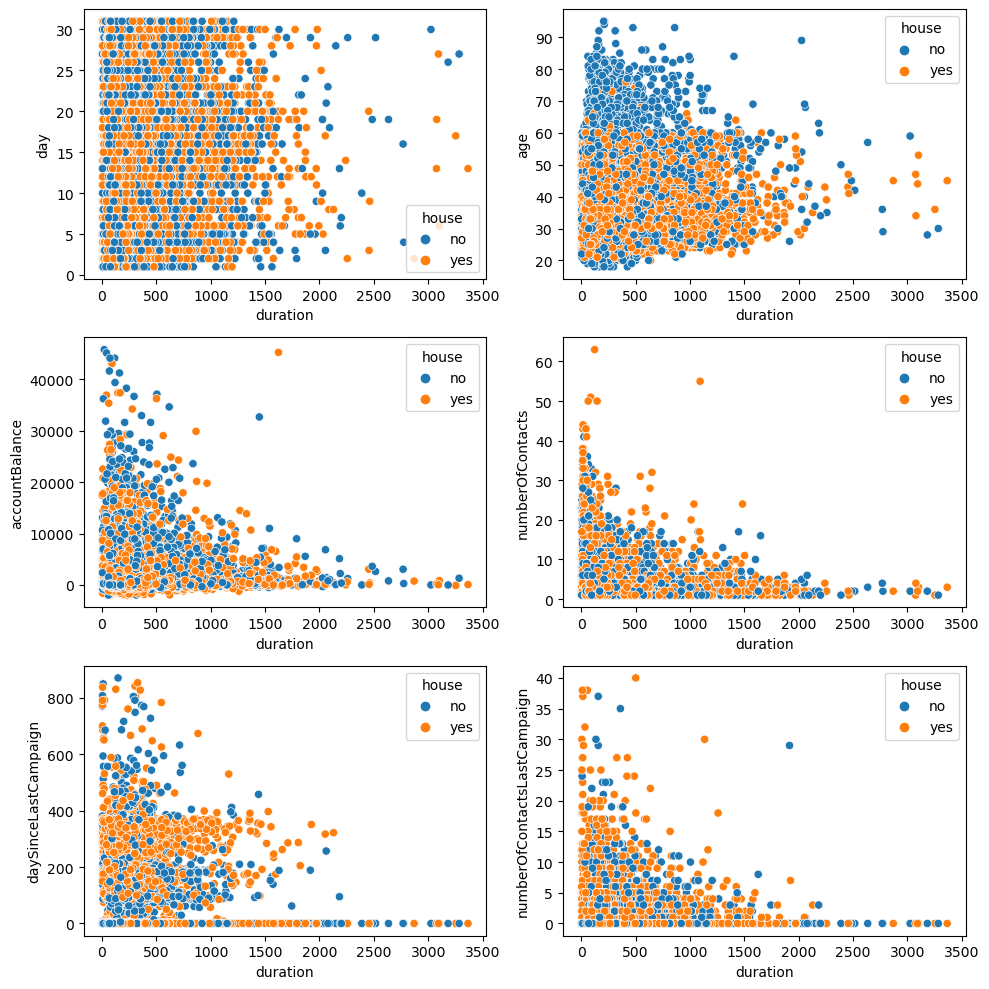

In [36]:
# Plotting Numeric columns against duration
cols = [x for x in num_cols if x != 'duration']

fig, axes = plt.subplots(3,2, figsize=(10,10))
for ax, col in zip(axes.ravel(), cols):
    sns.scatterplot(data=df, x='duration', y=col, ax=ax, hue='house')

fig.tight_layout()
plt.show()

The likelihood of house loans decrease with age. More records with days since last campaign ranging between 200 and 400 were more likely to subscribe to the product.

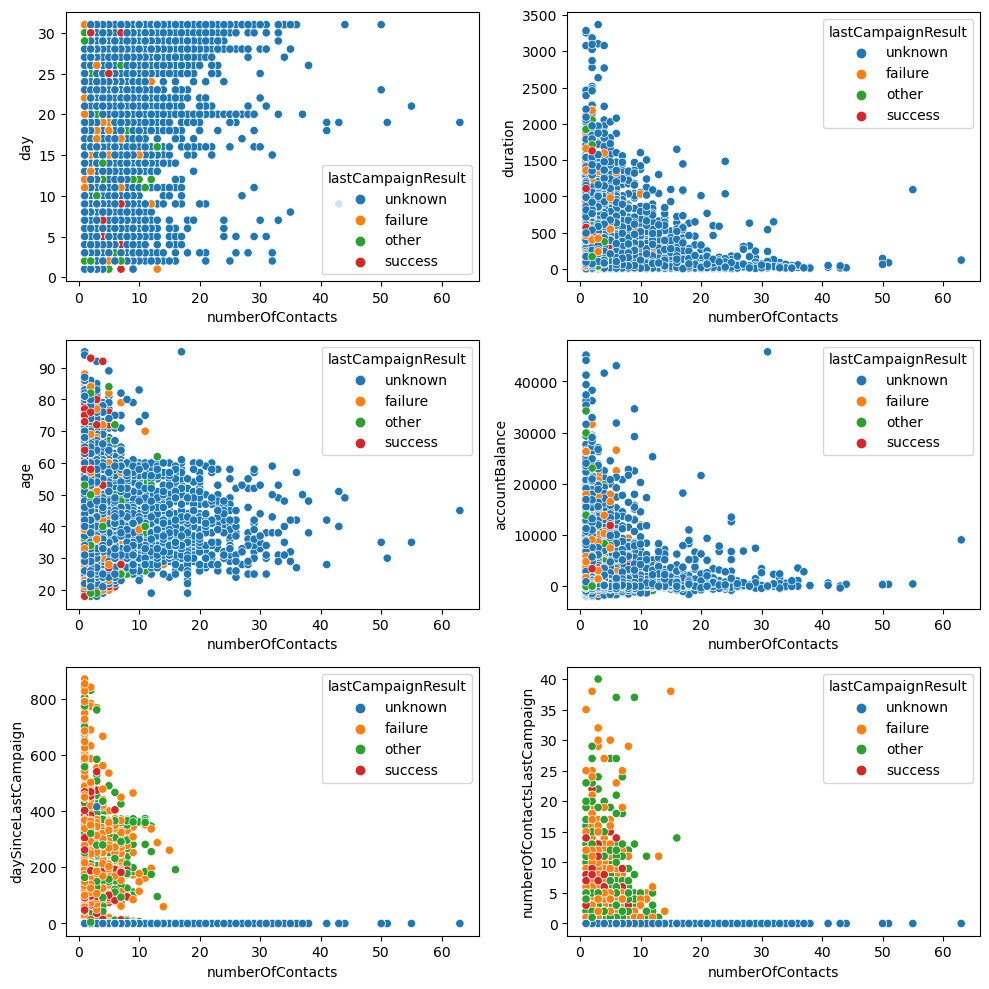

In [37]:
# Plotting Numeric columns against number of contacts
cols = [x for x in num_cols if x != 'numberOfContacts']

fig, axes = plt.subplots(3,2, figsize=(10,10))
for ax, col in zip(axes.ravel(), cols):
    sns.scatterplot(data=df, x='numberOfContacts', y=col, ax=ax, hue='lastCampaignResult')

fig.tight_layout()
plt.show()

For last campaign result, when days since last campaign and number of contacts last campaign exceeds 0, the values are most likely known (i.e. success, failure, other).

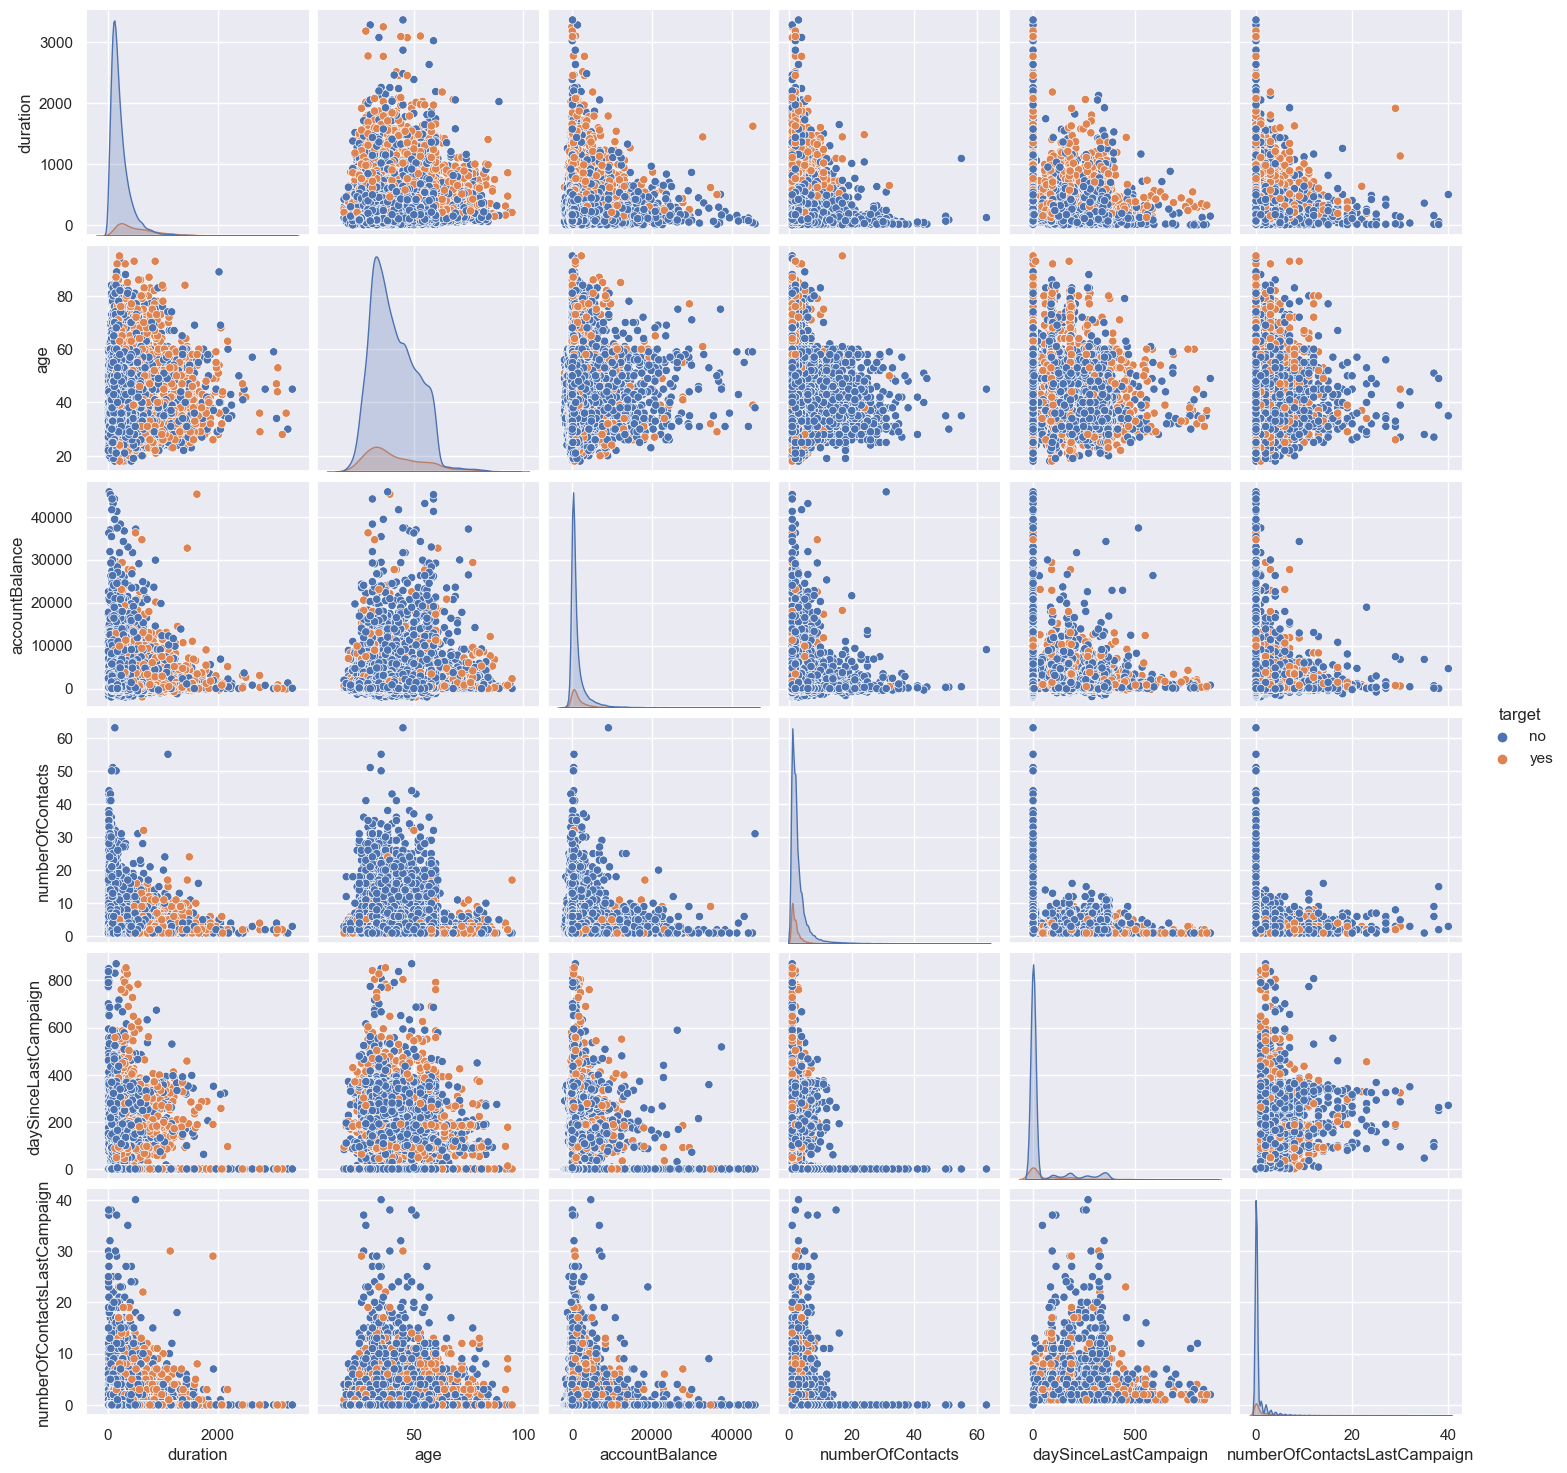

In [38]:
pp_cols = num_cols[1:] + ['target']

sns.set()
sns.pairplot(df[pp_cols], hue="target")
plt.show()

### Create a Test Set

In [181]:
test = pd.read_csv('test.csv')
test.head()

id  target  day month  duration  contactId  age gender        job   
0  432176974     NaN    5   may       283   69546777   35   male    manager  \
1  432157692     NaN   18   jul       111   69546887   31   male    manager   
2  432170850     NaN   29   jan       475   69550874   26   male  technical   
3  432151613     NaN    5   jun       209   69560082   26   male     worker   
4  432167744     NaN   18   nov       459   69561716   32   male     worker   

  maritalStatus     education creditFailure  accountBalance house credit   
0       married  uniGraduated            no              76    no     no  \
1       married  uniGraduated            no             557   yes     no   
2        single  uniGraduated            no            1274    no     no   
3       married    highSchool            no             986   yes     no   
4        single    highSchool            no            3845   yes     no   

  contactType  numberOfContacts  daySinceLastCampaign   
0   cellPhone                 1                 362.0  \
1   cellPhone                 1                   NaN   
2    landline                 2                   NaN   
3     unknown                 3                   NaN   
4   cellPhone                 3                   NaN   

   numberOfContactsLastCampaign lastCampaignResult  
0                             9            failure  
1                             0            unknown  
2                             0            unknown  
3                             0            unknown  
4                             0            unknown

### Looking for Correlations

In [40]:
df[num_cols].corr()

day  duration       age  accountBalance   
day                           1.000000 -0.032172 -0.009903        0.011448  \
duration                     -0.032172  1.000000 -0.004971        0.021464   
age                          -0.009903 -0.004971  1.000000        0.095049   
accountBalance                0.011448  0.021464  0.095049        1.000000   
numberOfContacts              0.159530 -0.084348  0.005877       -0.013823   
daySinceLastCampaign         -0.100063  0.000314 -0.027145        0.002945   
numberOfContactsLastCampaign -0.066236  0.002802  0.004772        0.026552   

                              numberOfContacts  daySinceLastCampaign   
day                                   0.159530             -0.100063  \
duration                             -0.084348              0.000314   
age                                   0.005877             -0.027145   
accountBalance                       -0.013823              0.002945   
numberOfContacts                      1.000000             -0.089302   
daySinceLastCampaign                 -0.089302              1.000000   
numberOfContactsLastCampaign         -0.039018              0.544954   

                              numberOfContactsLastCampaign  
day                                              -0.066236  
duration                                          0.002802  
age                                               0.004772  
accountBalance                                    0.026552  
numberOfContacts                                 -0.039018  
daySinceLastCampaign                              0.544954  
numberOfContactsLastCampaign                      1.000000

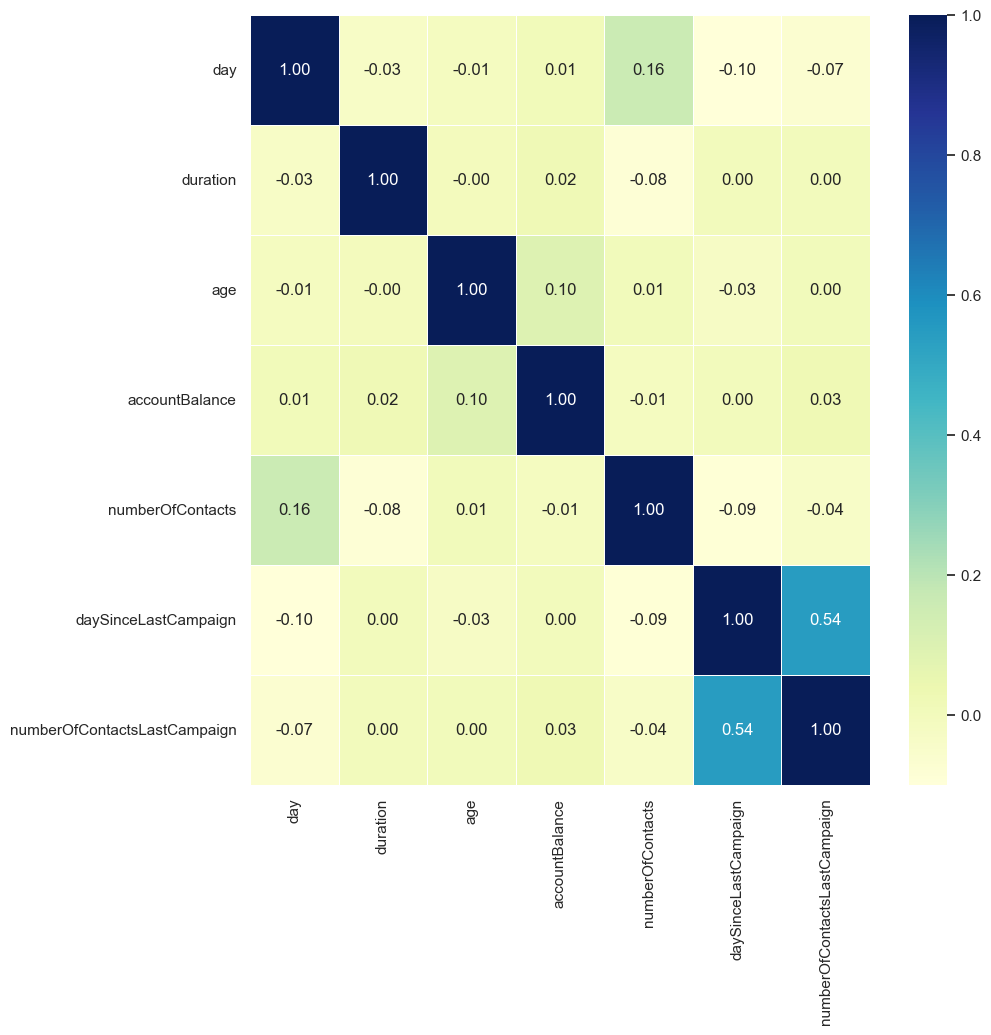

In [41]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

Correlations between numeric columns are very low. We'll encode the categorical variables.

### Handling Text and Categorical Attributes

In [42]:
df.head()

target  day month  duration  age  gender         job maritalStatus   
0     no   27   may       166   30  female      worker       married  \
1     no   26   oct       183   42  female     manager       married   
2     no    5   jun       227   26  female    services        single   
3     no    2   jun        31   34    male  unemployed      divorced   
4     no   15   may      1231   48    male      worker       married   

         education creditFailure  accountBalance house credit contactType   
0       highSchool            no            -202    no     no     unknown  \
1     uniGraduated            no            2463    no     no   cellPhone   
2       highSchool            no            2158   yes    yes    landline   
3     uniGraduated           yes              75   yes     no     unknown   
4  secondarySchool            no             559   yes     no     unknown   

   numberOfContacts  daySinceLastCampaign  numberOfContactsLastCampaign   
0                 2                   0.0                             0  \
1                 2                   0.0                             0   
2                 1                   0.0                             0   
3                 3                   0.0                             0   
4                 2                   0.0                             0   

  lastCampaignResult  
0            unknown  
1            unknown  
2            unknown  
3            unknown  
4            unknown

In [43]:
df[['target', 'creditFailure', 'house', 'credit']] = df[['target', 'creditFailure', 'house', 'credit']].applymap(lambda x: 1 if x == 'yes' else 0)

In [44]:
df[['target', 'creditFailure', 'house', 'credit']].head()

target  creditFailure  house  credit
0       0              0      0       0
1       0              0      0       0
2       0              0      1       1
3       0              1      1       0
4       0              0      1       0

In [45]:
ohe_cols = [x for x in cat_cols if x not in ['creditFailure', 'house', 'credit']]
cat_encoder = OneHotEncoder()

df[ohe_cols] = df[ohe_cols].astype('category')
n_cat_cols = [df[col].cat.codes for col in ohe_cols]
df_cat_1hot = pd.DataFrame(cat_encoder.fit_transform(df[ohe_cols]).toarray())
cat_cols1 = [j for i in cat_encoder.categories_ for j in i]
df_cat_1hot.columns = cat_cols1

In [46]:
df = pd.concat([df, df_cat_1hot], axis='columns').drop(columns=['month', 'gender', 'job', 'maritalStatus', 'education', 'contactType', 'lastCampaignResult'])
df.head()

target   day  duration   age  creditFailure  accountBalance  house  credit   
0     0.0  27.0     166.0  30.0            0.0          -202.0    0.0     0.0  \
1     0.0  26.0     183.0  42.0            0.0          2463.0    0.0     0.0   
2     0.0   5.0     227.0  26.0            0.0          2158.0    1.0     1.0   
3     0.0   2.0      31.0  34.0            1.0            75.0    1.0     0.0   
4     0.0  15.0    1231.0  48.0            0.0           559.0    1.0     0.0   

   numberOfContacts  daySinceLastCampaign  ...  secondarySchool  uniGraduated   
0               2.0                   0.0  ...              0.0           0.0  \
1               2.0                   0.0  ...              0.0           1.0   
2               1.0                   0.0  ...              0.0           0.0   
3               3.0                   0.0  ...              0.0           1.0   
4               2.0                   0.0  ...              1.0           0.0   

   unknown  cellPhone  landline  unknown  failure  other  success  unknown  
0      0.0        0.0       0.0      1.0      0.0    0.0      0.0      1.0  
1      0.0        1.0       0.0      0.0      0.0    0.0      0.0      1.0  
2      0.0        0.0       1.0      0.0      0.0    0.0      0.0      1.0  
3      0.0        0.0       0.0      1.0      0.0    0.0      0.0      1.0  
4      0.0        0.0       0.0      1.0      0.0    0.0      0.0      1.0  

[5 rows x 51 columns]

In [47]:
corr_matrix = df.corr()
corr_matrix

target       day  duration       age   
target                        1.000000 -0.034060  0.396454  0.026826  \
day                          -0.034060  1.000000 -0.032172 -0.009903   
duration                      0.396454 -0.032172  1.000000 -0.004971   
age                           0.026826 -0.009903 -0.004971  1.000000   
creditFailure                -0.020807  0.004752 -0.013558 -0.018224   
accountBalance                0.057040  0.011448  0.021464  0.095049   
house                        -0.136464 -0.023173  0.008720 -0.183597   
credit                       -0.065368  0.012225 -0.008416 -0.015206   
numberOfContacts             -0.075640  0.159530 -0.084348  0.005877   
daySinceLastCampaign          0.103591 -0.100063  0.000314 -0.027145   
numberOfContactsLastCampaign  0.111975 -0.066236  0.002802  0.004772   
apr                           0.005363  0.002814 -0.003950 -0.002436   
aug                           0.007236 -0.001840  0.007903  0.003093   
dec                           0.010771 -0.002947  0.000114  0.006212   
feb                          -0.000956 -0.001115 -0.004357  0.003326   
jan                           0.006630  0.007389 -0.004703 -0.004315   
jul                          -0.008242  0.001680 -0.003034 -0.010853   
jun                          -0.000737 -0.014986  0.000854  0.003735   
mar                           0.007771  0.009550  0.011191 -0.007467   
may                          -0.003784  0.003475  0.000071  0.006039   
nov                          -0.008053  0.000320  0.001575 -0.000713   
oct                           0.013704  0.001166  0.003844  0.002106   
sep                          -0.007032  0.004976 -0.010950 -0.002779   
female                        0.004520  0.001455 -0.003233  0.002711   
male                         -0.004520 -0.001455  0.003233 -0.002711   
administrative               -0.005192 -0.003861 -0.003443 -0.000617   
entrepreneur                 -0.001499 -0.006513 -0.001111 -0.000904   
houseWife                    -0.000222 -0.003686  0.002770  0.006780   
manager                      -0.005002  0.003889 -0.007757  0.000999   
retired                       0.008199 -0.013537 -0.001202  0.008081   
selfEmployed                  0.004706  0.001689  0.003438 -0.013736   
services                     -0.007646  0.005772 -0.004908  0.005085   
student                       0.001531 -0.000348  0.007235 -0.001343   
technical                     0.002326  0.006253  0.010991 -0.001961   
unemployed                    0.001031 -0.000753  0.007606  0.003318   
unknown                       0.002517  0.004660 -0.001085  0.006143   
worker                        0.004951 -0.000306 -0.003202 -0.004868   
divorced                      0.000596  0.002185  0.004188 -0.008789   
married                       0.006805 -0.001718 -0.005815  0.021235   
single                       -0.007804  0.000331  0.003371 -0.016874   
highSchool                   -0.008919 -0.002447 -0.000295  0.004396   
secondarySchool               0.010331 -0.008237  0.005071  0.008902   
uniGraduated                  0.001383  0.006880 -0.002101 -0.012991   
unknown                       0.000664  0.005206 -0.003566  0.002685   
cellPhone                     0.003169  0.006740  0.004209 -0.006736   
landline                     -0.002845 -0.000030 -0.011196 -0.001604   
unknown                      -0.001796 -0.007096  0.001651  0.007981   
failure                      -0.002374  0.002888 -0.004405  0.002472   
other                         0.004678  0.002066 -0.003917 -0.004077   
success                       0.009059  0.000788  0.009081  0.018556   
unknown                      -0.004683 -0.003750  0.001359 -0.008474   

                              creditFailure  accountBalance     house   
target                            -0.020807        0.057040 -0.136464  \
day                                0.004752        0.011448 -0.023173   
duration                          -0.013558        0.021464  0.00872

A few columns covary:

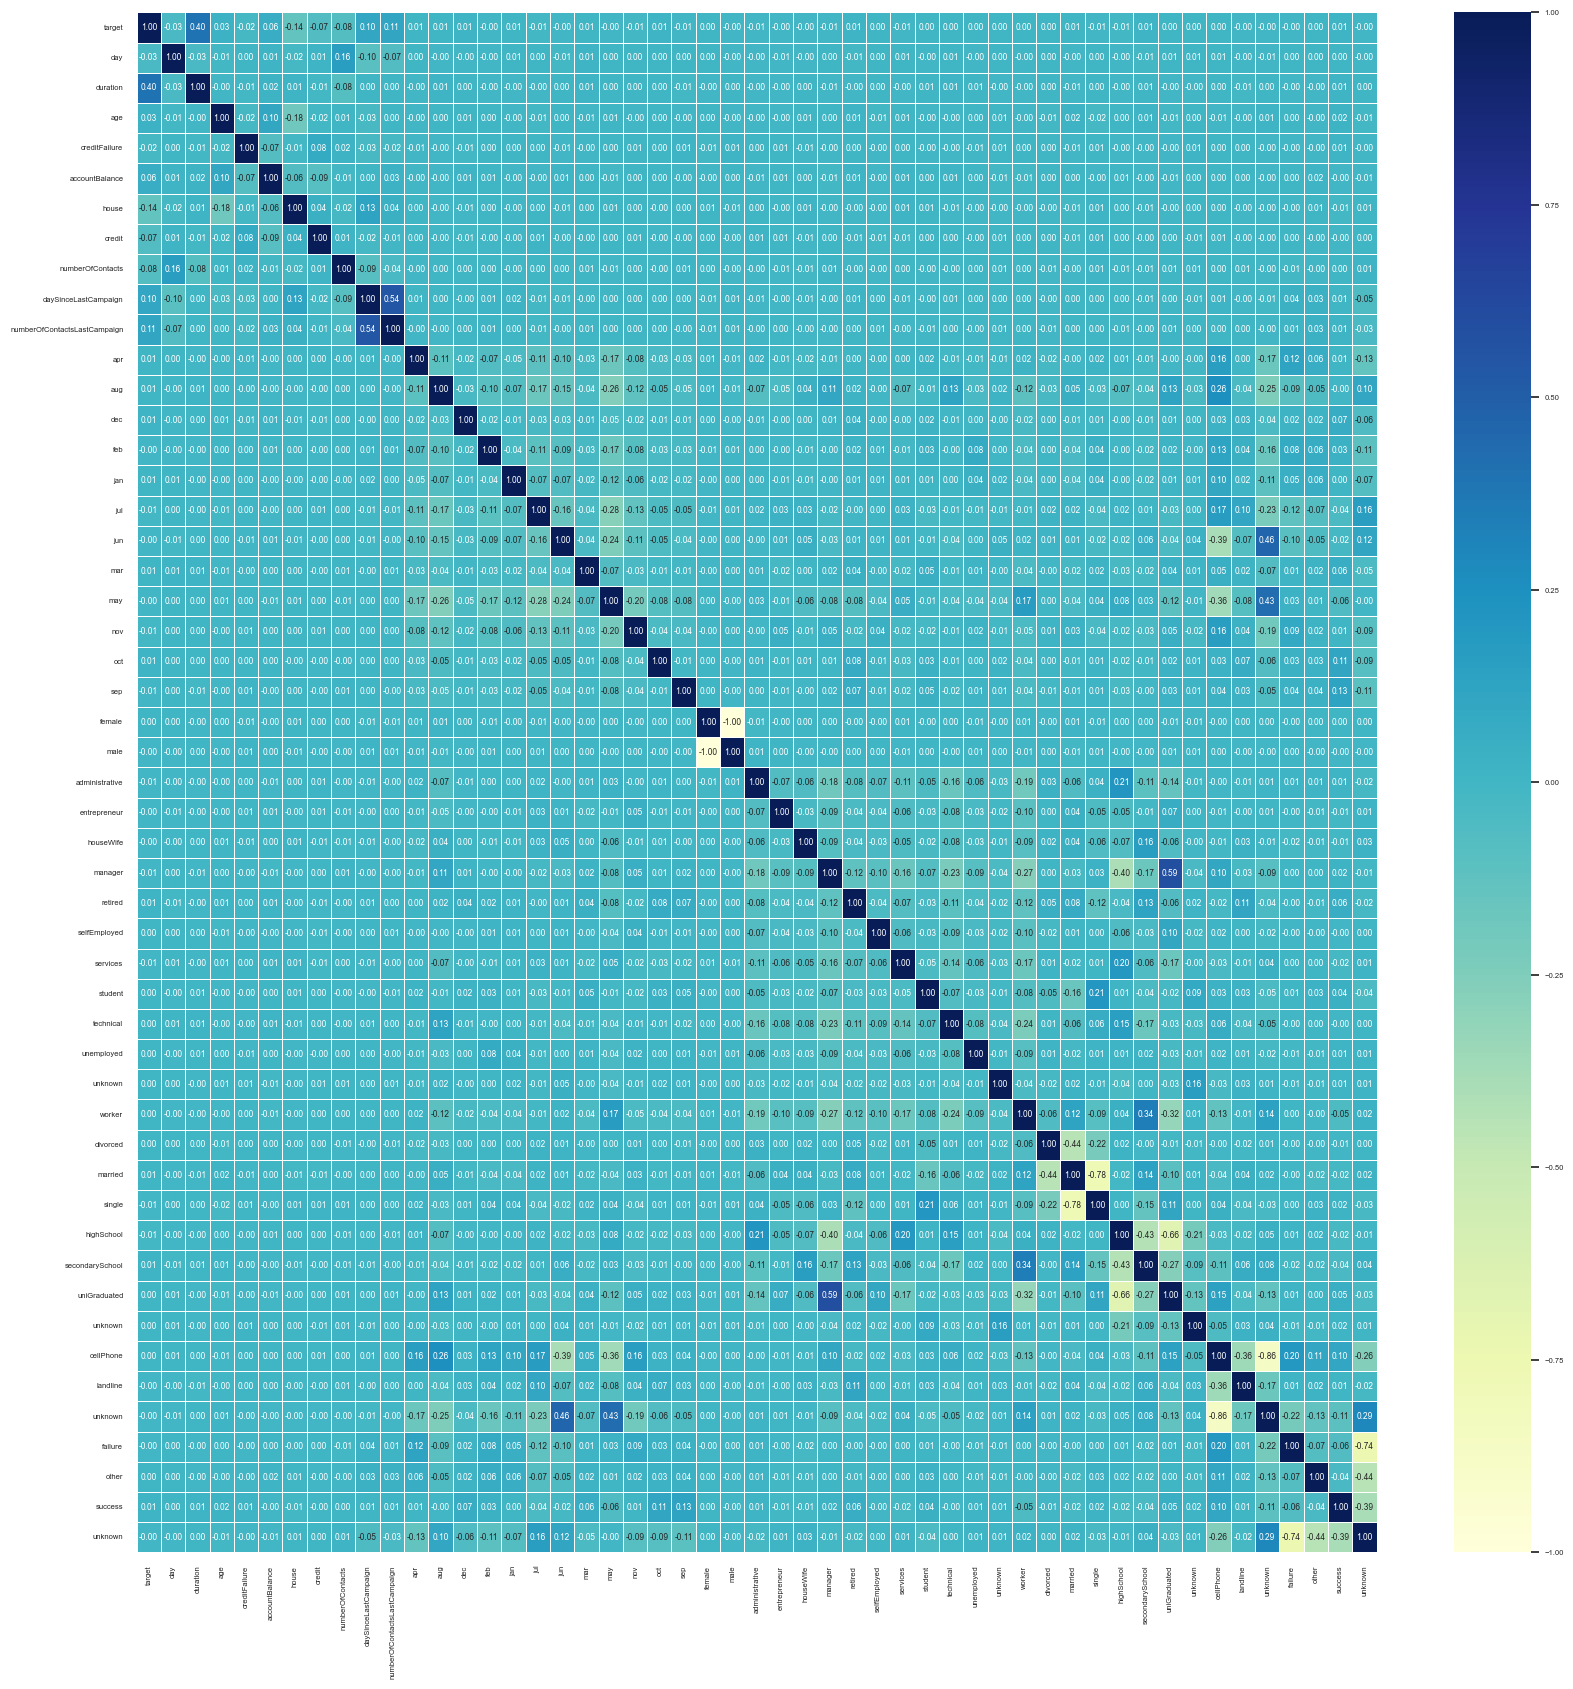

In [48]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=.5)
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

### Prepare Data for Machine Learning Algorithms

We'll create a pipeline to perform the cleaning operations already conducted on the data:

- Imputing values for null records
- Encoding values for categorical variables
- Scaling variables for the ML algorithms.

This section includes feature scaling and transformation pipelines.

In [49]:
df_train = train.copy()

In [50]:
numeric_features = ['day', 'duration', 'age', 'accountBalance', 'numberOfContacts', 'daySinceLastCampaign', 'numberOfContactsLastCampaign']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

ordinal_features = ['creditFailure', 'house', 'credit']
ordinal_transformer = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder())
    ]
)

categorical_features = ['month', 'gender', 'job', 'maritalStatus', 'education', 'contactType', 'lastCampaignResult']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

In [51]:
df_prepared = preprocessor.fit_transform(df_train)
df_prepared[:5]

array([[ 1.34576768, -0.36051512, -1.02885563, -0.52130948, -0.24836422,
        -0.10801662, -0.23660309,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.22562041, -0.29425713,  0.10012796,  0.37469715, -0.24836422,
        -0.10801662, -0.23660309,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.

In [52]:
preprocessor.get_feature_names_out()

array(['num__day', 'num__duration', 'num__age', 'num__accountBalance',
       'num__numberOfContacts', 'num__daySinceLastCampaign',
       'num__numberOfContactsLastCampaign', 'cat__month_apr',
       'cat__month_aug', 'cat__month_dec', 'cat__month_feb',
       'cat__month_jan', 'cat__month_jul', 'cat__month_jun',
       'cat__month_mar', 'cat__month_may', 'cat__month_nov',
       'cat__month_oct', 'cat__month_sep', 'cat__gender_female',
       'cat__gender_male', 'cat__job_administrative',
       'cat__job_entrepreneur', 'cat__job_houseWife', 'cat__job_manager',
       'cat__job_retired', 'cat__job_selfEmployed', 'cat__job_services',
       'cat__job_student', 'cat__job_technical', 'cat__job_unemployed',
       'cat__job_unknown', 'cat__job_worker',
       'cat__maritalStatus_divorced', 'cat__maritalStatus_married',
       'cat__maritalStatus_single', 'cat__education_highSchool',
       'cat__education_secondarySchool', 'cat__education_uniGraduated',
       'cat__education_unknown', '

### Training and Evaluation on Train Set

In [53]:
def drop_outliers(df):
    df.drop(index=df.loc[df['duration'] > 3500].index, inplace=True)
    df.drop(index=df.loc[df['numberOfContactsLastCampaign'].gt(40)].index, inplace=True)
    df.drop(index=df.loc[df['accountBalance'].lt(-2000) | df['accountBalance'].gt(50000)].index, inplace=True)
    return df

df_train = drop_outliers(df_train)
df_train.shape

(31456, 20)

In [54]:
X = df_train.drop(columns=['target', 'id', 'contactId'])
y = df_train['target'].apply(lambda x: 1 if x == 'yes' else 0)

X.shape, y.shape

((31456, 17), (31456,))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((15413, 17), (6606, 17), (9437, 17))

#### Training with Logistic Regression

In [56]:
# Baseline Model
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=500))]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.903


**Feature Importances**

In [57]:
feature_names = clf[:-1].get_feature_names_out()

coefs = pd.DataFrame(clf[-1].coef_.T,
                     columns=["Coefficients"],
                     index=feature_names,)
coefs

Coefficients
num__day                               0.111944
num__duration                          1.050630
num__age                              -0.018434
num__accountBalance                    0.041179
num__numberOfContacts                 -0.290263
num__daySinceLastCampaign             -0.010151
num__numberOfContactsLastCampaign      0.002134
cat__month_apr                        -0.043273
cat__month_aug                        -0.830252
cat__month_dec                         0.728242
cat__month_feb                        -0.017553
cat__month_jan                        -1.199522
cat__month_jul                        -0.884595
cat__month_jun                         0.420472
cat__month_mar                         1.435304
cat__month_may                        -0.406442
cat__month_nov                        -0.927933
cat__month_oct                         0.821761
cat__month_sep                         0.903200
cat__gender_female                    -0.020915
cat__gender_male                       0.020324
cat__job_administrative                0.060817
cat__job_entrepreneur                 -0.033100
cat__job_houseWife                    -0.394600
cat__job_manager                       0.022780
cat__job_retired                       0.331867
cat__job_selfEmployed                 -0.312060
cat__job_services                     -0.073001
cat__job_student                       0.445960
cat__job_technical                     0.033681
cat__job_unemployed                    0.005934
cat__job_unknown                       0.006526
cat__job_worker                       -0.095396
cat__maritalStatus_divorced            0.056046
cat__maritalStatus_married            -0.132096
cat__maritalStatus_single              0.075459
cat__education_highSchool              0.013358
cat__education_secondarySchool        -0.188429
cat__education_uniGraduated            0.278566
cat__education_unknown                -0.104087
cat__contactType_cellPhone             0.537897
cat__contactType_landline              0.548909
cat__contactType_unknown              -1.087397
cat__lastCampaignResult_failure       -0.516138
cat__lastCampaignResult_other         -0.327748
cat__lastCampaignResult_success        1.511437
cat__lastCampaignResult_unknown       -0.668142
ord__creditFailure                     0.013890
ord__house                            -0.625664
ord__credit                           -0.395108

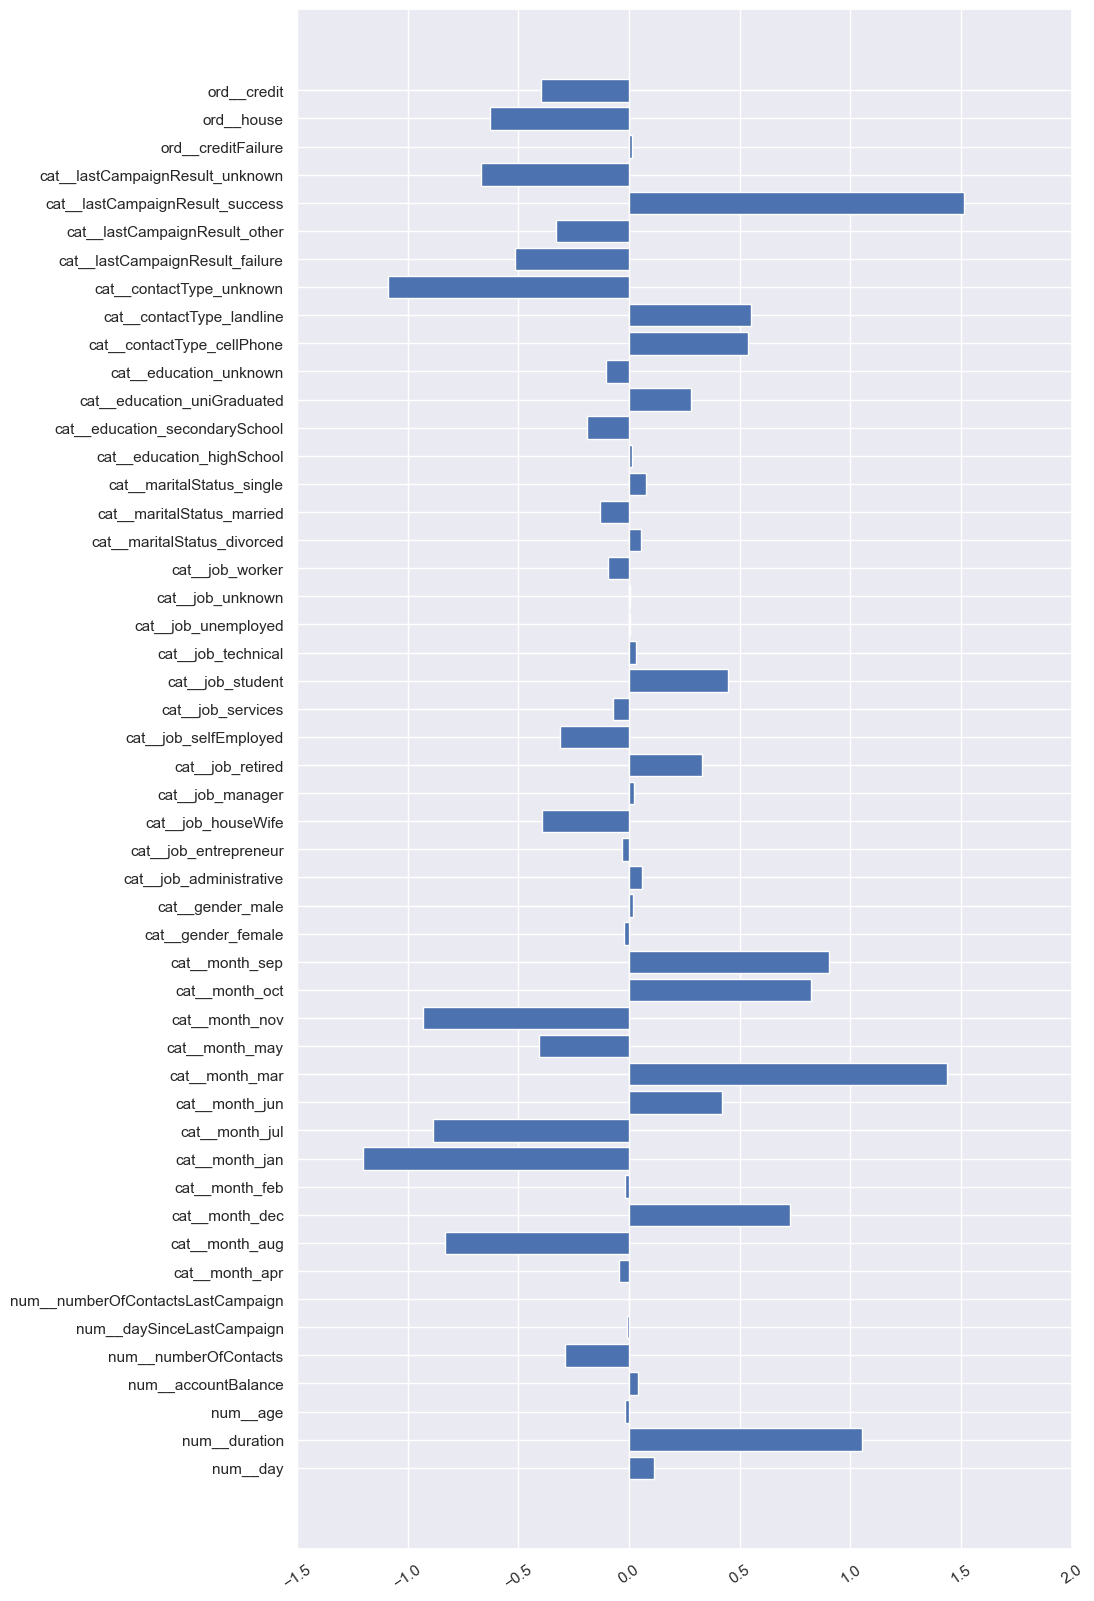

In [58]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(coefs.index, coefs['Coefficients'])
locs, labels = plt.xticks()
plt.xticks(ticks=locs, labels=labels, rotation=35)
plt.show()

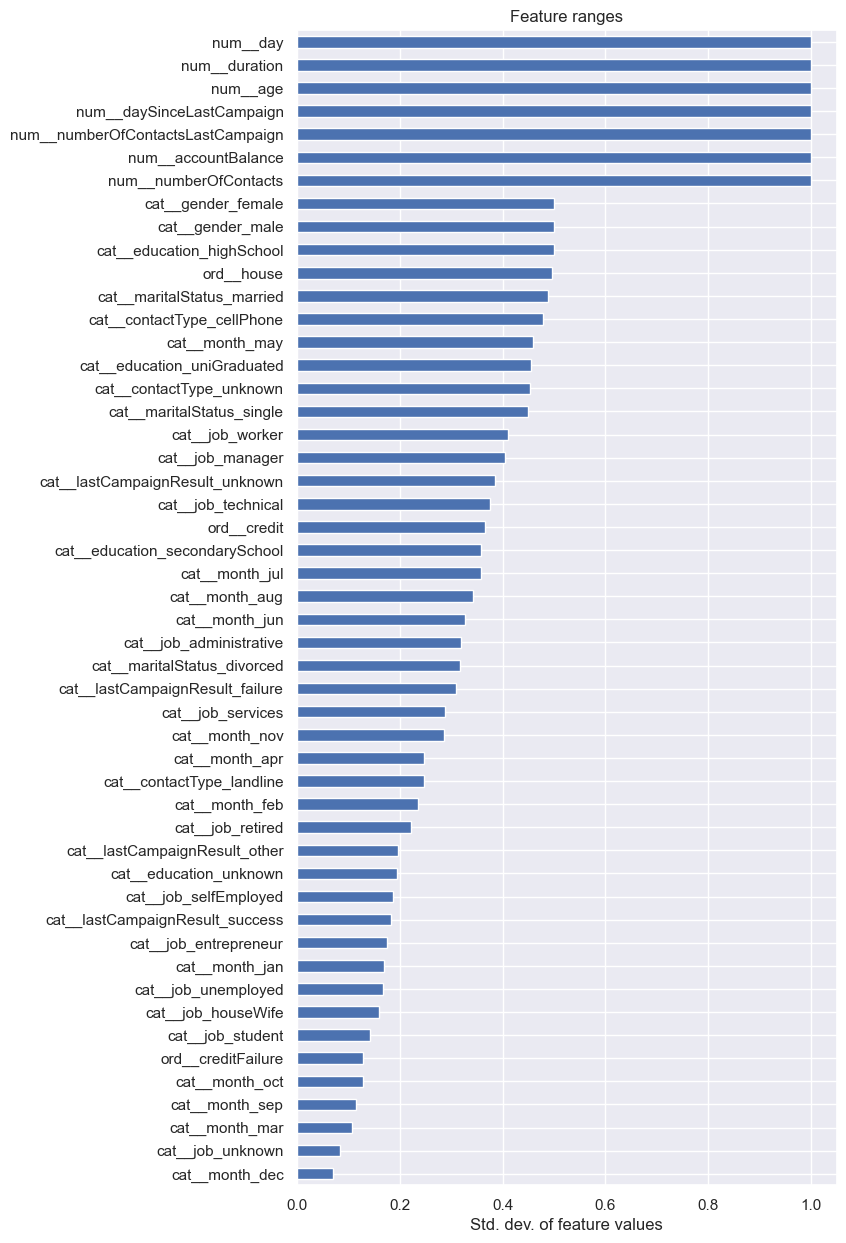

In [59]:
X_train_preprocessed = pd.DataFrame(
    clf[:-1].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).sort_values(ascending=False).plot.barh(figsize=(9, 15)).invert_yaxis()
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measure. In this way, we emphasize that the greater the variance of a feature, the larger the weight of the corresponding coefficient on the output, all else being equal.

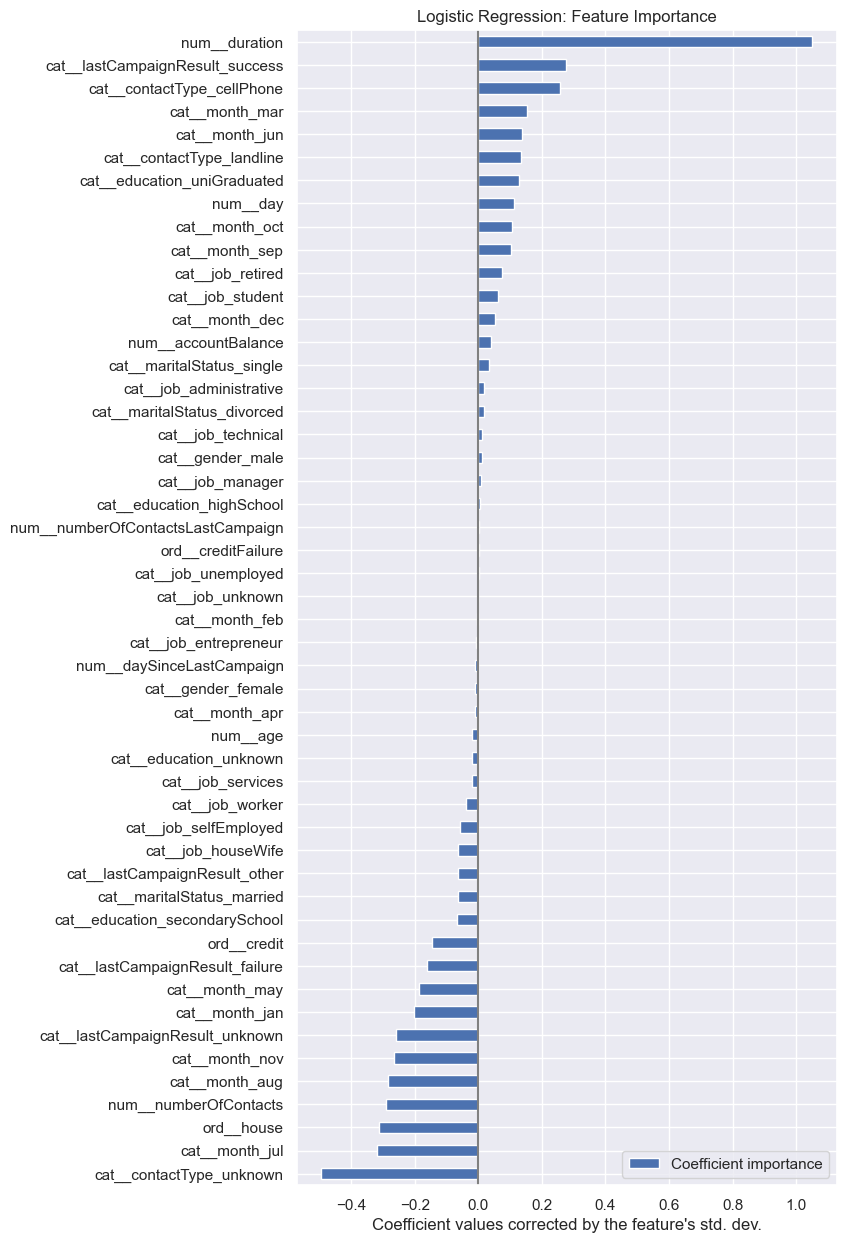

In [60]:
coefs = pd.DataFrame(
    X_train_preprocessed.std(axis=0) * clf[-1].coef_.T.reshape(-1),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.sort_values(by='Coefficient importance',
                  ascending=False).plot(kind="barh", figsize=(9, 15)).invert_yaxis()
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Logistic Regression: Feature Importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

We'll consider important features as those with coefficient importance higher than 0.2 and lower than -0.2.

In [61]:
feat_imp = coefs.loc[coefs['Coefficient importance'].lt(-.2) | coefs['Coefficient importance'].gt(.2)].index.tolist()
# feat_imp = [x[5:] for x in feat_imp]
feat_imp

['num__duration',
 'num__numberOfContacts',
 'cat__month_aug',
 'cat__month_jan',
 'cat__month_jul',
 'cat__month_nov',
 'cat__contactType_cellPhone',
 'cat__contactType_unknown',
 'cat__lastCampaignResult_success',
 'cat__lastCampaignResult_unknown',
 'ord__house']

**Preprocessing with PCA**

In [62]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('pca', PCA(n_components=.99)),
        ("classifier", LogisticRegression(max_iter=500))]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.899


In [63]:
# Using only feature importance
X_train_p = preprocessor.fit_transform(X_train)
X_train_p = pd.DataFrame(X_train_p,
                         columns=preprocessor.get_feature_names_out())

X_val_p = preprocessor.transform(X_val)
X_val_p = pd.DataFrame(X_val_p,
                         columns=preprocessor.get_feature_names_out())

X_test_p = preprocessor.transform(X_test)
X_test_p = pd.DataFrame(X_test_p,
                         columns=preprocessor.get_feature_names_out())

X_train_p.head()

num__day  num__duration  num__age  num__accountBalance   
0 -0.937312      -0.193931  0.936879             0.445612  \
1 -0.817169      -0.742438 -0.280787            -0.099544   
2  1.105130       0.389839 -0.655454            -0.352015   
3 -0.456738      -0.789453  1.779879            -0.395026   
4  0.624555       0.139092 -0.842787             2.583572   

   num__numberOfContacts  num__daySinceLastCampaign   
0              -0.247950                  -0.186245  \
1               1.009896                  -0.108268   
2               0.066512                  -0.108268   
3              -0.247950                  -0.108268   
4              -0.562411                  -0.108268   

   num__numberOfContactsLastCampaign  cat__month_apr  cat__month_aug   
0                           1.267730             0.0             0.0  \
1                          -0.305796             0.0             0.0   
2                          -0.305796             0.0             1.0   
3                          -0.305796             0.0             0.0   
4                          -0.305796             0.0             0.0   

   cat__month_dec  ...  cat__contactType_cellPhone  cat__contactType_landline   
0             0.0  ...                         1.0                        0.0  \
1             0.0  ...                         0.0                        0.0   
2             0.0  ...                         1.0                        0.0   
3             0.0  ...                         0.0                        0.0   
4             0.0  ...                         0.0                        0.0   

   cat__contactType_unknown  cat__lastCampaignResult_failure   
0                       0.0                              0.0  \
1                       1.0                              0.0   
2                       0.0                              0.0   
3                       1.0                              0.0   
4                       1.0                              0.0   

   cat__lastCampaignResult_other  cat__lastCampaignResult_success   
0                            0.0                              1.0  \
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   cat__lastCampaignResult_unknown  ord__creditFailure  ord__house   
0                              0.0                 0.0         0.0  \
1                              1.0                 0.0         0.0   
2                              1.0                 0.0         0.0   
3                              1.0                 0.0         1.0   
4                              1.0                 0.0         1.0   

   ord__credit  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          1.0  

[5 rows x 50 columns]

In [64]:
clf = Pipeline(
    steps=[
        ('pca', PCA(n_components=.99)),
        ("classifier", LogisticRegression(max_iter=500))]
)

clf.fit(X_train_p[feat_imp], y_train)
print("model score: %.3f" % clf.score(X_val_p[feat_imp], y_val))

model score: 0.899


**Preprocessing with KMeans**

In [65]:
X_train_p = preprocessor.fit_transform(X_train)

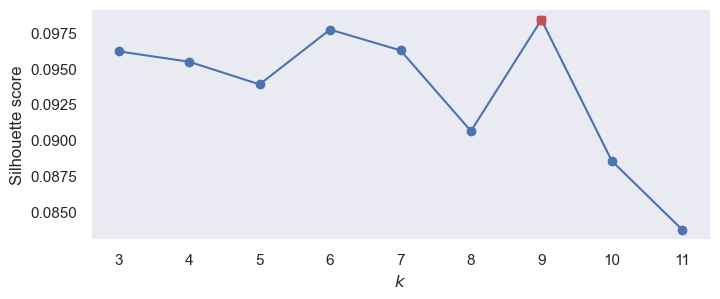

In [66]:
k_range = list(range(3, 12))
kmeans_per_k = [KMeans(n_clusters=k, random_state=42,
                       n_init='auto').fit(X_train_p)
                for k in k_range]

silhouette_scores = [silhouette_score(X_train_p, model.labels_)
                     for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

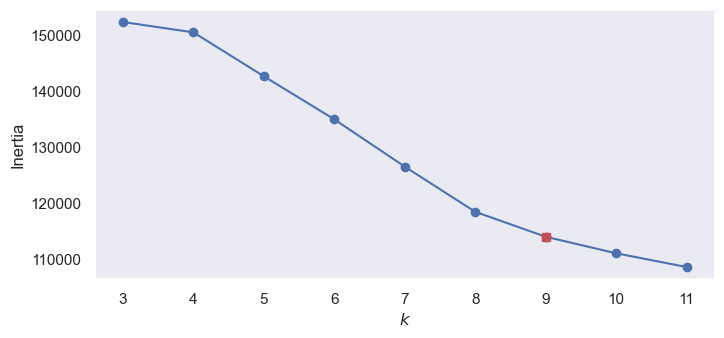

In [67]:
# Compare silhouette score with Inertia

inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [68]:
# Cluster using best k
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=9, n_init='auto', random_state=42)

In [69]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('kmeans', best_model),
        ("classifier", LogisticRegression(max_iter=500))]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.894


In [70]:
# Using only feature importance
X_train_p = preprocessor.fit_transform(X_train)
X_train_p = pd.DataFrame(X_train_p,
                         columns=preprocessor.get_feature_names_out())

X_val_p = preprocessor.transform(X_val)
X_val_p = pd.DataFrame(X_val_p,
                       columns=preprocessor.get_feature_names_out())

X_test_p = preprocessor.transform(X_test)
X_test_p = pd.DataFrame(X_test_p,
                        columns=preprocessor.get_feature_names_out())

In [71]:
clf = Pipeline(
    steps=[
        ('kmeans', best_model),
        ("classifier", LogisticRegression(max_iter=500))]
)

clf.fit(X_train_p[feat_imp], y_train)
print("model score: %.3f" % clf.score(X_val_p[feat_imp], y_val))

model score: 0.892


**Test other Models**

We'll restrict testing to feature impportance to make model lighter.

In [72]:
X_train_p = X_train_p[feat_imp]
X_val_p = X_val_p[feat_imp]
X_test_p = X_test_p[feat_imp]

In [73]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'SGDClassifier': SGDClassifier(),
          'XGBoost': XGBClassifier(),
          'Multi-Layer Perceptron': MLPClassifier(max_iter=1000),
          'SVC': SVC(),
          'Extra Trees': ExtraTreesClassifier(),
          'Gradient Boost': GradientBoostingClassifier(),
          'LightGBM': LGBMClassifier(),
          }

y_preds = dict()
accuracies = list()
precisions = list()
recalls = list()
f1_scores = list()
classification_reports = list()

for i in range(len(list(models.keys()))):
    model = list(models.values())[i]

    # Train Model
    model.fit(X_train_p, y_train)

    # Make predictions
    y_pred = model.predict(X_val_p)
    y_preds[list(models.keys())[i]] = y_pred

    # Evaluate model
    model_acc = accuracy_score(y_val, y_pred)
    accuracies.append(model_acc)
    model_prec = precision_score(y_val, y_pred)
    precisions.append(model_prec)
    model_rec = recall_score(y_val, y_pred)
    recalls.append(model_rec)
    model_f1 = f1_score(y_val, y_pred)
    model_class = classification_report(y_val, y_pred)

    print(list(models.keys())[i])
    print(f'Accuracy Score: {model_acc:.2f}')
    print(f'Precision Score: {model_prec:.2f}')
    print(f'Recall Score: {model_rec:.2f}')
    print(f'F1 Score: {model_f1:.2f}')

    print('='*35)
    print('\n')

print(f'Average Accuracy across Models: {np.mean(accuracies):.2f}')


Logistic Regression
Accuracy Score: 0.90
Precision Score: 0.64
Recall Score: 0.31
F1 Score: 0.42


Decision Tree
Accuracy Score: 0.87
Precision Score: 0.43
Recall Score: 0.42
F1 Score: 0.43


Random Forest
Accuracy Score: 0.88
Precision Score: 0.47
Recall Score: 0.42
F1 Score: 0.45


SGDClassifier
Accuracy Score: 0.90
Precision Score: 0.62
Recall Score: 0.30
F1 Score: 0.40


XGBoost
Accuracy Score: 0.90
Precision Score: 0.58
Recall Score: 0.38
F1 Score: 0.46


Multi-Layer Perceptron
Accuracy Score: 0.90
Precision Score: 0.60
Recall Score: 0.34
F1 Score: 0.43


SVC
Accuracy Score: 0.90
Precision Score: 0.64
Recall Score: 0.33
F1 Score: 0.43


Extra Trees
Accuracy Score: 0.87
Precision Score: 0.45
Recall Score: 0.42
F1 Score: 0.43


Gradient Boost
Accuracy Score: 0.90
Precision Score: 0.63
Recall Score: 0.39
F1 Score: 0.49


LightGBM
Accuracy Score: 0.90
Precision Score: 0.62
Recall Score: 0.38
F1 Score: 0.47


Average Accuracy across Models: 0.89


We can assume that accuracy is high because of the balance of negatives to positives in the dataset (88:12). This means that if the model predicts a negative, it will most likely be correct. This makes accuracy a weak metric for our purpose. Let's confirm with a visual.

Visualize the predictions:

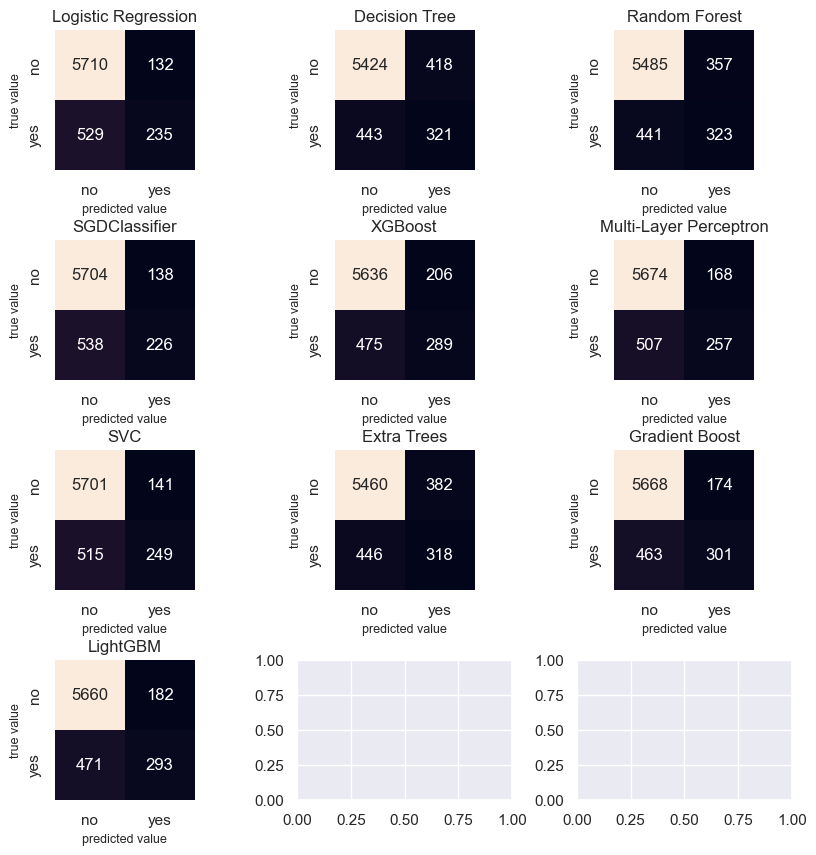

In [74]:
sns.set()
fig, axes = plt.subplots(4,3, figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=.3)

for ax, (key, val) in zip(axes.ravel(), y_preds.items()):
    mat = confusion_matrix(y_val, val)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], ax=ax)
    ax.set_title(key)
    ax.set_xlabel('predicted value', fontsize=9)
    ax.set_ylabel('true value', fontsize=9);

This model struggles to predict positives. This reflects the overall low precision. Let's address this.

**Precision vs Recall**

Precision refers to the number of positive predictions that were accurate. Recall refers to the number of actual positives that were accurately identified. These scores share a negative correlation, the higher one goes, the lower the other. We use precision when we want positive predictions to be as accurate as possible, and we use recall when we want the model to spot as many actual positives as possible.

All our models except Decision Tree have higher precisions and lower recalls. This means that the model's ability to predict positives is higher than its ability to identify positives. Given our purpose (predicting customers who will subscribe),precision is a more relevant metric.

Precision and Recall across the models are below 70% and from our visuals there is a higher number of false negatives across all the models. We'll remodel again setting the class_weight parameter to 'balanced' to see how we can increase these scores:

In [75]:
models = {'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
          'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
          'Random Forest': RandomForestClassifier(class_weight='balanced'),
          'SGDClassifier': SGDClassifier(class_weight='balanced'),
          'XGBoost': XGBClassifier(scale_pos_weight=.88),
          'SVC': SVC(class_weight='balanced'),
          'Multi-Layer Perceptron': MLPClassifier(max_iter=1000),
          'Extra Trees': ExtraTreesClassifier(class_weight='balanced'),
          'Gradient Boost': GradientBoostingClassifier(),
          'LightGBM': LGBMClassifier(),

          }

y_preds = dict()
accuracies = list()
precisions = list()
recalls = list()
f1_scores = list()
classification_reports = list()

for i in range(len(list(models.keys()))):
    model = list(models.values())[i]

    # Train Model
    model.fit(X_train_p, y_train)

    # Make predictions
    y_pred = model.predict(X_val_p)
    y_preds[list(models.keys())[i]] = y_pred

    # Evaluate model
    model_acc = accuracy_score(y_val, y_pred)
    accuracies.append(model_acc)
    model_prec = precision_score(y_val, y_pred)
    precisions.append(model_prec)
    model_rec = recall_score(y_val, y_pred)
    recalls.append(model_rec)
    model_f1 = f1_score(y_val, y_pred)
    model_class = classification_report(y_val, y_pred)

    print(list(models.keys())[i])
    print(f'Accuracy Score: {model_acc:.2f}')
    print(f'Precision Score: {model_prec:.2f}')
    print(f'Recall Score: {model_rec:.2f}')
    print(f'F1 Score: {model_f1:.2f}')

    print('='*35)
    print('\n')

print(f'Average Accuracy across Models: {np.mean(accuracies):.2f}')


Logistic Regression
Accuracy Score: 0.83
Precision Score: 0.38
Recall Score: 0.81
F1 Score: 0.52


Decision Tree
Accuracy Score: 0.85
Precision Score: 0.38
Recall Score: 0.44
F1 Score: 0.41


Random Forest
Accuracy Score: 0.87
Precision Score: 0.43
Recall Score: 0.43
F1 Score: 0.43


SGDClassifier
Accuracy Score: 0.76
Precision Score: 0.31
Recall Score: 0.89
F1 Score: 0.46


XGBoost
Accuracy Score: 0.90
Precision Score: 0.60
Recall Score: 0.34
F1 Score: 0.44


SVC
Accuracy Score: 0.81
Precision Score: 0.37
Recall Score: 0.86
F1 Score: 0.51


Multi-Layer Perceptron
Accuracy Score: 0.90
Precision Score: 0.60
Recall Score: 0.36
F1 Score: 0.45


Extra Trees
Accuracy Score: 0.86
Precision Score: 0.41
Recall Score: 0.44
F1 Score: 0.42


Gradient Boost
Accuracy Score: 0.90
Precision Score: 0.63
Recall Score: 0.39
F1 Score: 0.49


LightGBM
Accuracy Score: 0.90
Precision Score: 0.62
Recall Score: 0.38
F1 Score: 0.47


Average Accuracy across Models: 0.86


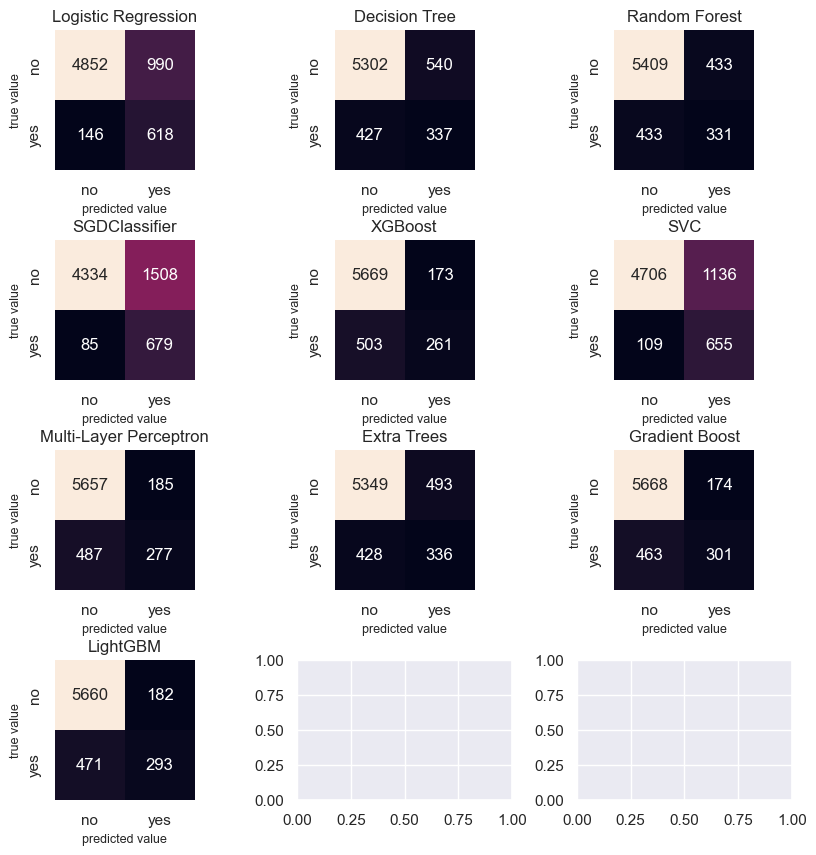

In [76]:
sns.set()
fig, axes = plt.subplots(4,3, figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=.3)

for ax, (key, val) in zip(axes.ravel(), y_preds.items()):
    mat = confusion_matrix(y_val, val)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], ax=ax)
    ax.set_title(key)
    ax.set_xlabel('predicted value', fontsize=9)
    ax.set_ylabel('true value', fontsize=9);

Balancing the weights increases recall for all models except XGBoost which performs poorer across all metrics. From our visual, these models more accurately identify positives. However, it misidentifies more negatives, dragging down the accuracy.

For our purpose, we'd like the model to make accurate predictions, i.e. predict persons who will actually subscribe to our product. This means we emphasize the precision value.

For much better predictions, we have 2 options:
- Streamline/ downsample our dataset to reflect more yes's in the targets. This may not be helpful as it may not reflect the state of the real world data. However, we'll create a train set that meets this requirement to confirm if it works.
- Emphasizing tree based algorithms (forests and boosts) which are most suited for dealing with imbalanced datasets
-

**Balancing the Dataset**

We'll try oversampling and undersampling to select the best models:

In [77]:
from collections import Counter
seed = 66

In [78]:
X_resampled1, y_resampled1 = SMOTE().fit_resample(X_train_p, y_train)
print(sorted(Counter(y_resampled1).items()))

[(0, 13574), (1, 13574)]


In [79]:
# Oversampled dataset
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'SGDClassifier': SGDClassifier(),
          'XGBoost': XGBClassifier(),
          'Multi-Layer Perceptron': MLPClassifier(max_iter=1000),
          'SVC': SVC(),
          'Extra Trees': ExtraTreesClassifier(),
          'Gradient Boost': GradientBoostingClassifier(),
          'LightGBM': LGBMClassifier(),
          }

y_preds = dict()
accuracies = list()
precisions = list()
recalls = list()
f1_scores = list()
classification_reports = list()

for i in range(len(list(models.keys()))):
    model = list(models.values())[i]

    # Train Model
    model.fit(X_resampled1, y_resampled1)

    # Make predictions
    y_pred = model.predict(X_val_p)
    y_preds[list(models.keys())[i]] = y_pred

    # Evaluate model
    model_acc = accuracy_score(y_val, y_pred)
    accuracies.append(model_acc)
    model_prec = precision_score(y_val, y_pred)
    precisions.append(model_prec)
    model_rec = recall_score(y_val, y_pred)
    recalls.append(model_rec)
    model_f1 = f1_score(y_val, y_pred)
    model_class = classification_report(y_val, y_pred)

    print(list(models.keys())[i])
    print(f'Accuracy Score: {model_acc:.2f}')
    print(f'Precision Score: {model_prec:.2f}')
    print(f'Recall Score: {model_rec:.2f}')
    print(f'F1 Score: {model_f1:.2f}')

    print('='*35)
    print('\n')

print(f'Average Accuracy across Models: {np.mean(accuracies):.2f}')

Logistic Regression
Accuracy Score: 0.83
Precision Score: 0.39
Recall Score: 0.81
F1 Score: 0.52


Decision Tree
Accuracy Score: 0.84
Precision Score: 0.37
Recall Score: 0.61
F1 Score: 0.46


Random Forest
Accuracy Score: 0.84
Precision Score: 0.37
Recall Score: 0.61
F1 Score: 0.46


SGDClassifier
Accuracy Score: 0.83
Precision Score: 0.39
Recall Score: 0.80
F1 Score: 0.52


XGBoost
Accuracy Score: 0.84
Precision Score: 0.40
Recall Score: 0.77
F1 Score: 0.53


Multi-Layer Perceptron
Accuracy Score: 0.81
Precision Score: 0.36
Recall Score: 0.85
F1 Score: 0.50


SVC
Accuracy Score: 0.81
Precision Score: 0.37
Recall Score: 0.86
F1 Score: 0.51


Extra Trees
Accuracy Score: 0.84
Precision Score: 0.37
Recall Score: 0.59
F1 Score: 0.45


Gradient Boost
Accuracy Score: 0.83
Precision Score: 0.38
Recall Score: 0.83
F1 Score: 0.52


LightGBM
Accuracy Score: 0.83
Precision Score: 0.39
Recall Score: 0.79
F1 Score: 0.53


Average Accuracy across Models: 0.83


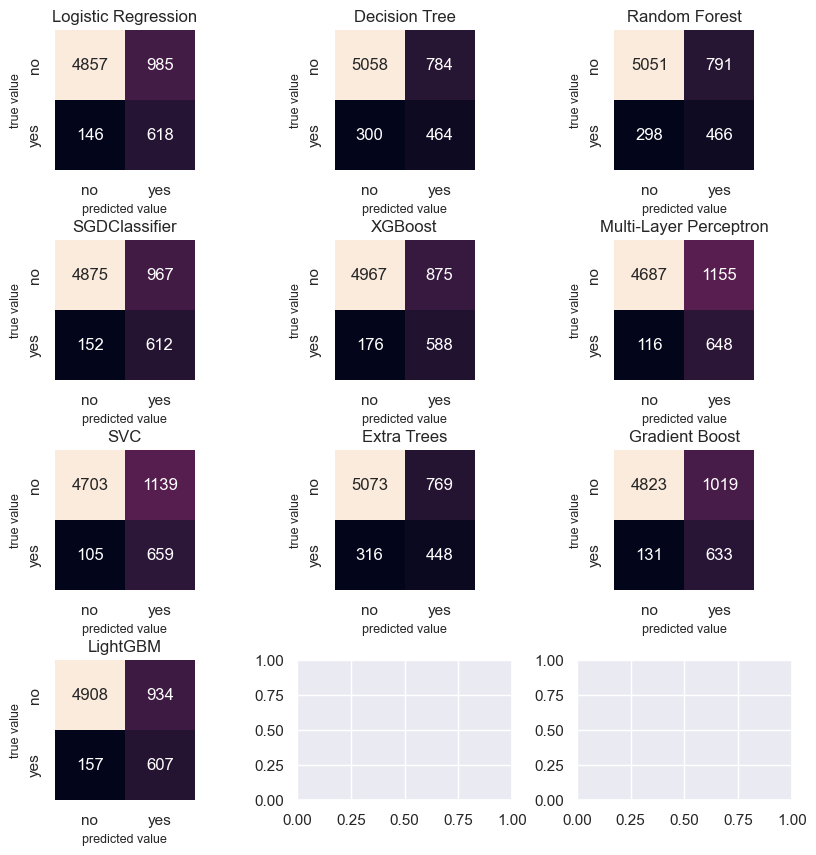

In [80]:
sns.set()
fig, axes = plt.subplots(4,3, figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=.3)

for ax, (key, val) in zip(axes.ravel(), y_preds.items()):
    mat = confusion_matrix(y_val, val)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], ax=ax)
    ax.set_title(key)
    ax.set_xlabel('predicted value', fontsize=9)
    ax.set_ylabel('true value', fontsize=9);

In [81]:
X_resampled, y_resampled = CondensedNearestNeighbour(n_neighbors=3).fit_resample(X_train_p, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 2031), (1, 1839)]


In [82]:
# Downsampled dataset
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'SGDClassifier': SGDClassifier(),
          'XGBoost': XGBClassifier(),
          'Multi-Layer Perceptron': MLPClassifier(max_iter=1000),
          'SVC': SVC(),
          'Extra Trees': ExtraTreesClassifier(),
          'Gradient Boost': GradientBoostingClassifier(),
          'LightGBM': LGBMClassifier(),
          }

y_preds = dict()
accuracies = list()
precisions = list()
recalls = list()
f1_scores = list()
classification_reports = list()

for i in range(len(list(models.keys()))):
    model = list(models.values())[i]

    # Train Model
    model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred = model.predict(X_val_p)
    y_preds[list(models.keys())[i]] = y_pred

    # Evaluate model
    model_acc = accuracy_score(y_val, y_pred)
    accuracies.append(model_acc)
    model_prec = precision_score(y_val, y_pred)
    precisions.append(model_prec)
    model_rec = recall_score(y_val, y_pred)
    recalls.append(model_rec)
    model_f1 = f1_score(y_val, y_pred)
    model_class = classification_report(y_val, y_pred)

    print(list(models.keys())[i])
    print(f'Accuracy Score: {model_acc:.2f}')
    print(f'Precision Score: {model_prec:.2f}')
    print(f'Recall Score: {model_rec:.2f}')
    print(f'F1 Score: {model_f1:.2f}')

    print('='*35)
    print('\n')

print(f'Average Accuracy across Models: {np.mean(accuracies):.2f}')


Logistic Regression
Accuracy Score: 0.90
Precision Score: 0.57
Recall Score: 0.48
F1 Score: 0.52


Decision Tree
Accuracy Score: 0.73
Precision Score: 0.22
Recall Score: 0.52
F1 Score: 0.31


Random Forest
Accuracy Score: 0.80
Precision Score: 0.30
Recall Score: 0.51
F1 Score: 0.38


SGDClassifier
Accuracy Score: 0.90
Precision Score: 0.60
Recall Score: 0.44
F1 Score: 0.51


XGBoost
Accuracy Score: 0.85
Precision Score: 0.39
Recall Score: 0.55
F1 Score: 0.45


Multi-Layer Perceptron
Accuracy Score: 0.89
Precision Score: 0.54
Recall Score: 0.57
F1 Score: 0.55


SVC
Accuracy Score: 0.90
Precision Score: 0.57
Recall Score: 0.50
F1 Score: 0.53


Extra Trees
Accuracy Score: 0.77
Precision Score: 0.26
Recall Score: 0.51
F1 Score: 0.34


Gradient Boost
Accuracy Score: 0.89
Precision Score: 0.52
Recall Score: 0.55
F1 Score: 0.54


LightGBM
Accuracy Score: 0.88
Precision Score: 0.49
Recall Score: 0.56
F1 Score: 0.52


Average Accuracy across Models: 0.85


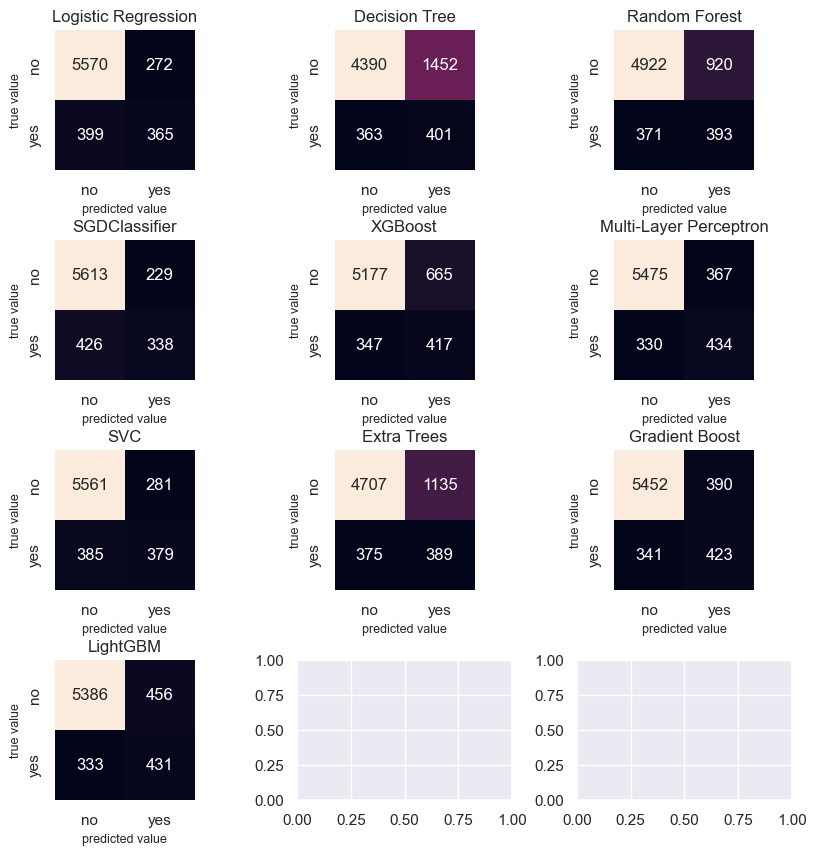

In [83]:
sns.set()
fig, axes = plt.subplots(4,3, figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=.3)

for ax, (key, val) in zip(axes.ravel(), y_preds.items()):
    mat = confusion_matrix(y_val, val)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], ax=ax)
    ax.set_title(key)
    ax.set_xlabel('predicted value', fontsize=9)
    ax.set_ylabel('true value', fontsize=9);

Undersampling leads to better predictions, with better precision and recall values. The best models are:
- Logistic Regression
- Multi-Layer Perceptron
- Stochastic Gradient Descent
- SVC
- Gradient Boost
- LightGBM

We'll move forward with these models.

### Better Evaluation Using Cross Validation

In [86]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'SGDClassifier': SGDClassifier(),
          'Multi Layer Perceptron': MLPClassifier(max_iter=1000),
          'Gradient Boost': GradientBoostingClassifier(),
          'SVC': SVC(),
          'LightGBM': LGBMClassifier(),
          }

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

In [87]:
# Oversampled Dataset
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    scores = cross_validate(model, X_resampled1, y_resampled1, cv=5,
                            scoring=scoring, return_train_score=True)
    print(list(models.keys())[i])
    # print('train_accuracy:', [f'{x:.2f}' for x in scores["train_acc"]])
    print('test_accuracy:', [f'{x:.2f}' for x in scores["test_acc"]])
    # print('train_precision:', [f'{x:.2f}' for x in scores["train_prec_macro"]])
    print('test_precision:', [f'{x:.2f}' for x in scores["test_prec_macro"]])
    # print('train_recall:', [f'{x:.2f}' for x in scores["train_rec_micro"]])
    print('test_recall:', [f'{x:.2f}' for x in scores["test_rec_micro"]])

    print('='*35)
    print('\n')


Logistic Regression
test_accuracy: ['0.82', '0.82', '0.82', '0.82', '0.82']
test_precision: ['0.82', '0.82', '0.82', '0.82', '0.82']
test_recall: ['0.82', '0.82', '0.82', '0.82', '0.82']


SGDClassifier
test_accuracy: ['0.82', '0.82', '0.82', '0.83', '0.82']
test_precision: ['0.83', '0.82', '0.82', '0.83', '0.83']
test_recall: ['0.82', '0.82', '0.82', '0.83', '0.82']


Multi Layer Perceptron
test_accuracy: ['0.85', '0.86', '0.86', '0.86', '0.85']
test_precision: ['0.85', '0.86', '0.87', '0.86', '0.86']
test_recall: ['0.85', '0.86', '0.86', '0.86', '0.85']


Gradient Boost
test_accuracy: ['0.85', '0.86', '0.86', '0.86', '0.86']
test_precision: ['0.85', '0.86', '0.87', '0.86', '0.86']
test_recall: ['0.85', '0.86', '0.86', '0.86', '0.86']


SVC
test_accuracy: ['0.84', '0.84', '0.84', '0.84', '0.84']
test_precision: ['0.84', '0.84', '0.84', '0.84', '0.84']
test_recall: ['0.84', '0.84', '0.84', '0.84', '0.84']


LightGBM
test_accuracy: ['0.85', '0.88', '0.89', '0.88', '0.88']
test_precision

In [88]:
# Downsampled Dataset
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    scores = cross_validate(model, X_resampled, y_resampled, cv=5,
                            scoring=scoring, return_train_score=True)
    print(list(models.keys())[i])
    # print('train_accuracy:', [f'{x:.2f}' for x in scores["train_acc"]])
    print('test_accuracy:', [f'{x:.2f}' for x in scores["test_acc"]])
    # print('train_precision:', [f'{x:.2f}' for x in scores["train_prec_macro"]])
    print('test_precision:', [f'{x:.2f}' for x in scores["test_prec_macro"]])
    # print('train_recall:', [f'{x:.2f}' for x in scores["train_rec_micro"]])
    print('test_recall:', [f'{x:.2f}' for x in scores["test_rec_micro"]])

    print('='*35)
    print('\n')


Logistic Regression
test_accuracy: ['0.68', '0.67', '0.62', '0.60', '0.55']
test_precision: ['0.74', '0.70', '0.62', '0.60', '0.55']
test_recall: ['0.67', '0.66', '0.61', '0.60', '0.55']


SGDClassifier
test_accuracy: ['0.59', '0.61', '0.57', '0.56', '0.49']
test_precision: ['0.71', '0.70', '0.58', '0.59', '0.50']
test_recall: ['0.57', '0.59', '0.58', '0.54', '0.50']


Multi Layer Perceptron
test_accuracy: ['0.67', '0.66', '0.61', '0.57', '0.52']
test_precision: ['0.69', '0.66', '0.61', '0.58', '0.52']
test_recall: ['0.66', '0.65', '0.61', '0.58', '0.52']


Gradient Boost
test_accuracy: ['0.68', '0.66', '0.61', '0.59', '0.53']
test_precision: ['0.71', '0.67', '0.60', '0.59', '0.53']
test_recall: ['0.66', '0.65', '0.60', '0.59', '0.53']


SVC
test_accuracy: ['0.67', '0.66', '0.63', '0.59', '0.54']
test_precision: ['0.72', '0.68', '0.63', '0.59', '0.54']
test_recall: ['0.66', '0.65', '0.62', '0.59', '0.54']


LightGBM
test_accuracy: ['0.66', '0.60', '0.57', '0.53', '0.49']
test_precision

For the oversampled dataset, accuracy, precision and recall are high across all models. The best models there are: MLP, Gradient Boosting and Light GBM.

For the downsampled dataset, the metrics reduce with each validation implying overfitting for the smaller dataset. However, the best models are: MLP, SVC and Light GBM.

The MLP and LightGBM models performed best on all evaluation metrics. We'll move forward with these models. Let's test the model with the different preprocessed datasets.

**Multi-Layer Perceptron**

In [90]:
# Base Model
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", MLPClassifier(max_iter=10000))]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.890


In [91]:
# PCA model
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('pca', PCA(.99)),
        ("classifier", MLPClassifier(max_iter=10000))]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.882


In [92]:
# KMeans model
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('kmeans', best_model),
        ("classifier", MLPClassifier(max_iter=10000))]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.891


**Light Gradient Boosting Model**

In [93]:
# Base Model
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LGBMClassifier())]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.904


In [94]:
# PCA model
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('pca', PCA(.99)),
        ("classifier", LGBMClassifier())]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.904


In [95]:
# KMeans model
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('kmeans', best_model),
        ("classifier", LGBMClassifier())]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.894


**SVC**

The best model is the base model, although there is an incremental increase in accuracy for the MLP Kmeans model.

### Hyperparamater Tuning

**MLPClassifier**

In [96]:
param_grid = {
    'max_iter':[10000],
    'activation':['relu', 'logistic', 'tanh'],
    'solver':['sgd','adam']}

In [97]:
grid = GridSearchCV(MLPClassifier(), param_grid, refit=True, verbose=2)
grid.fit(X_train_p, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .........activation=relu, max_iter=1000, solver=sgd; total time=   2.2s
[CV] END .........activation=relu, max_iter=1000, solver=sgd; total time=   2.3s
[CV] END .........activation=relu, max_iter=1000, solver=sgd; total time=   2.2s
[CV] END .........activation=relu, max_iter=1000, solver=sgd; total time=   2.2s
[CV] END .........activation=relu, max_iter=1000, solver=sgd; total time=   2.4s
[CV] END ........activation=relu, max_iter=1000, solver=adam; total time=   3.6s
[CV] END ........activation=relu, max_iter=1000, solver=adam; total time=   2.6s
[CV] END ........activation=relu, max_iter=1000, solver=adam; total time=   3.3s
[CV] END ........activation=relu, max_iter=1000, solver=adam; total time=   5.2s
[CV] END ........activation=relu, max_iter=1000, solver=adam; total time=   3.1s
[CV] END .....activation=logistic, max_iter=1000, solver=sgd; total time=   6.1s
[CV] END .....activation=logistic, max_iter=1000,

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'max_iter': [1000], 'solver': ['sgd', 'adam']},
             verbose=2)

**LightGBM**

In [98]:
param_grid1 = {
    'n_estimators':[300, 500],
    'max_depth': np.arange(5, 8),
    'class_weight':['balanced',  None]}

In [99]:
grid1 = GridSearchCV(LGBMClassifier(), param_grid1, refit=True, verbose=2)
grid1.fit(X_train_p, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END class_weight=balanced, max_depth=5, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=5, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=5, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=5, n_estimators=300; total time=   0.5s
[CV] END class_weight=balanced, max_depth=5, n_estimators=300; total time=   0.6s
[CV] END class_weight=balanced, max_depth=5, n_estimators=500; total time=   1.1s
[CV] END class_weight=balanced, max_depth=5, n_estimators=500; total time=   1.1s
[CV] END class_weight=balanced, max_depth=5, n_estimators=500; total time=   1.0s
[CV] END class_weight=balanced, max_depth=5, n_estimators=500; total time=   0.9s
[CV] END class_weight=balanced, max_depth=5, n_estimators=500; total time=   1.0s
[CV] END class_weight=balanced, max_depth=6, n_estimators=300; total time=   1.0s
[CV] END class_weight=balanced, max_d

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': array([5, 6, 7]),
                         'n_estimators': [300, 500]},
             verbose=2)

**SVC**

In [121]:
param_grid2 = {
    'C':[1, 10],
    'gamma':[1, 0.1, 0.001, 0.0001],
    'kernel':['linear','rbf']}

In [122]:
grid2 = GridSearchCV(SVC(), param_grid2, refit=True, verbose=2)
grid2.fit(X_train_p, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.9s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.8s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.9s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.8s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.8s
[CV] END ......................C=1, gamma=0.1, k

### Analyze Best Models and their Scores

**MLPClassifier**

In [100]:
grid.best_estimator_

MLPClassifier(activation='logistic', max_iter=1000)

In [101]:
grid.best_score_

0.8970346268909299

In [102]:
grid.best_params_

{'activation': 'logistic', 'max_iter': 1000, 'solver': 'adam'}

In [103]:
model = grid.best_estimator_

model.fit(X_train_p, y_train)
y_pred = model.predict(X_test_p)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8344
           1       0.64      0.39      0.49      1093

    accuracy                           0.90      9437
   macro avg       0.78      0.68      0.72      9437
weighted avg       0.89      0.90      0.89      9437



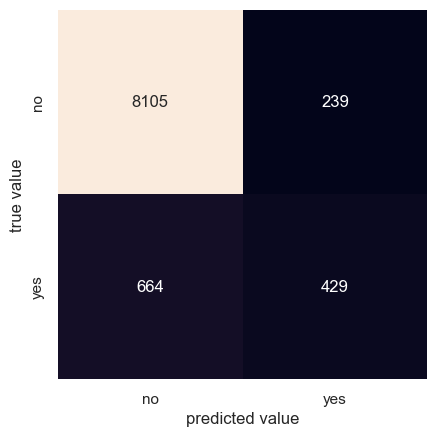

In [104]:
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('MLPClassifier');

In [105]:
X_p = preprocessor.fit_transform(X)
X_p[:5]

array([[ 1.3457292 , -0.36175717, -1.02868898, -0.55868444, -0.24831623,
        -0.10776998, -0.30609858,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.2255761 , -0.29516434,  0.10074063,  0.41328512, -0.24831623,
        -0.10776998, -0.30609858,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.

In [107]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(model, X_p, y, cv=5)

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reac

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls,
                                       thresholds, threshold=0):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    # plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
    plt.xlim(np.min(thresholds), np.max(thresholds))
    plt.ylim(np.min(recalls), np.max(recalls))
    plt.xlabel('Thresholds')
    plt.legend(loc="upper left")
    plt.grid(visible=True)

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds, threshold=1)
plt.title('MLPClassifier')
plt.show()

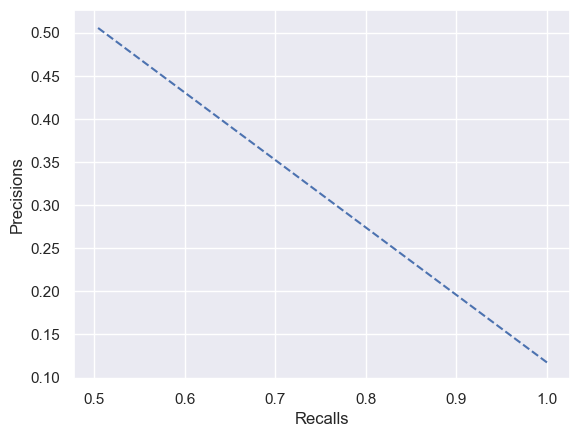

In [109]:
plt.plot(recalls[:-1], precisions[:-1], "b--")
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.title('MLPClassifier')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
plot_roc_curve(fpr, tpr)
plt.title('MLPClassifier')
plt.show()

**LightGBM**

In [111]:
grid1.best_estimator_

LGBMClassifier(max_depth=5, n_estimators=300)

In [112]:
grid1.best_params_

{'class_weight': None, 'max_depth': 5, 'n_estimators': 300}

In [113]:
grid1.best_score_

0.8926229813574388

In [114]:
model = grid1.best_estimator_

model.fit(X_train_p, y_train)
y_pred = model.predict(X_test_p)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8344
           1       0.63      0.39      0.48      1093

    accuracy                           0.90      9437
   macro avg       0.77      0.68      0.71      9437
weighted avg       0.89      0.90      0.89      9437



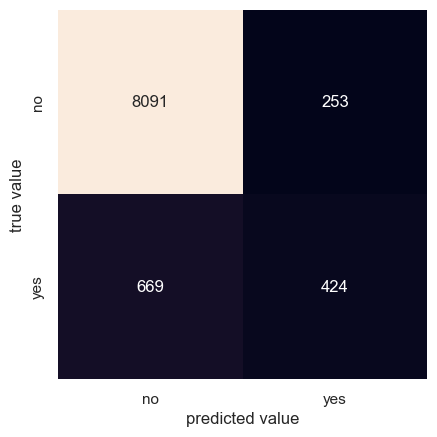

In [115]:
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('LightGBM');

In [116]:
X_p = preprocessor.fit_transform(X)
X_p[:5]

array([[ 1.3457292 , -0.36175717, -1.02868898, -0.55868444, -0.24831623,
        -0.10776998, -0.30609858,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.2255761 , -0.29516434,  0.10074063,  0.41328512, -0.24831623,
        -0.10776998, -0.30609858,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.

In [125]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(model, X_p, y, cv=5)

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

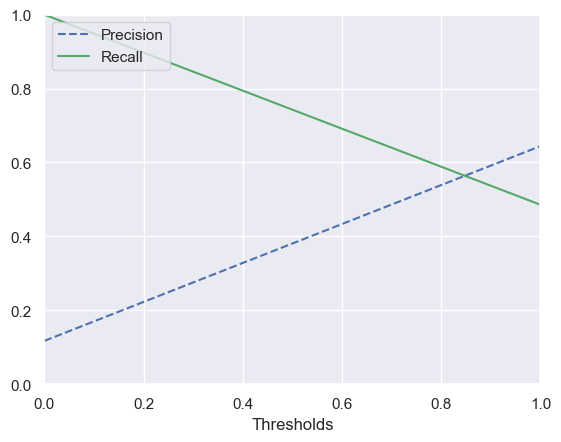

In [118]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds, threshold=1)
plt.title('LightGBM')
plt.show()

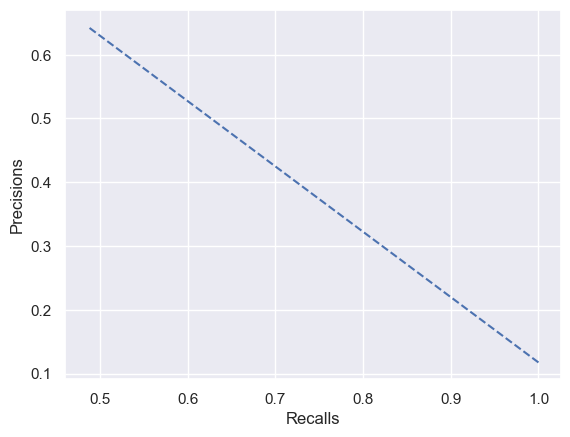

In [119]:
plt.plot(recalls[:-1], precisions[:-1], "b--")
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.title('LightGBM')
plt.show()

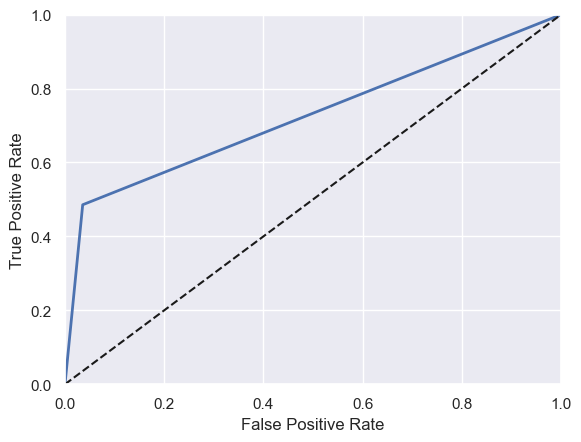

In [120]:
fpr, tpr, thresholds = roc_curve(y, y_scores)
plot_roc_curve(fpr, tpr)
plt.title('LightGBM')
plt.show()

**SVC**

In [126]:
grid2.best_estimator_

SVC(C=10, gamma=1)

In [127]:
grid2.best_score_

0.8946341148198563

In [128]:
grid2.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [133]:
model = grid2.best_estimator_

model.fit(X_train_p, y_train)
y_pred = model.predict(X_test_p)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8344
           1       0.62      0.34      0.44      1093

    accuracy                           0.90      9437
   macro avg       0.77      0.66      0.69      9437
weighted avg       0.88      0.90      0.89      9437



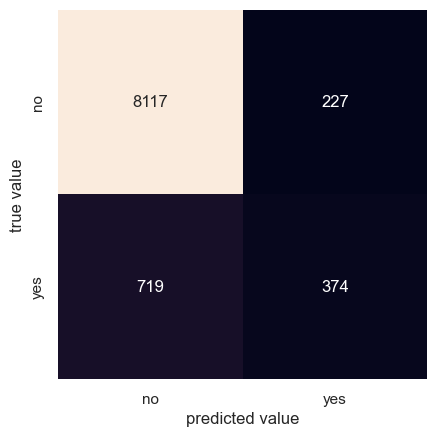

In [134]:
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('SVC');

In [135]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(model, X_p, y, cv=5, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

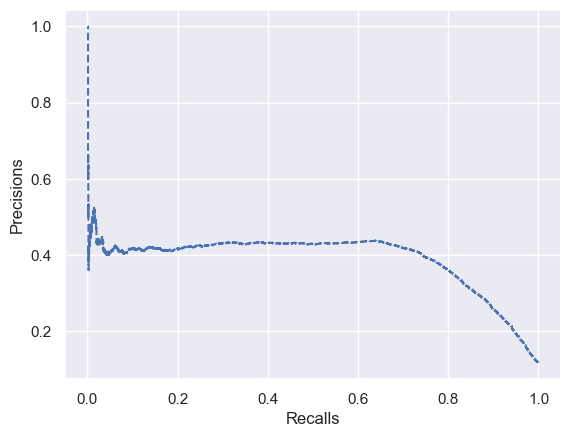

In [136]:
plt.plot(recalls[:-1], precisions[:-1], "b--")
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.title('SVC')
plt.show()

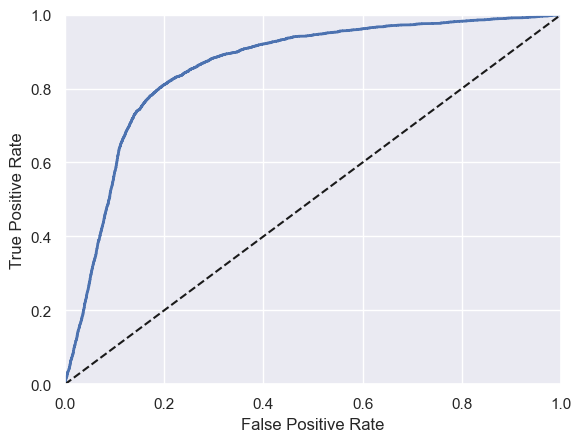

In [137]:
fpr, tpr, thresholds = roc_curve(y, y_scores)

plot_roc_curve(fpr, tpr)
plt.title('SVC')
plt.show()

### Evaluate Model on the Test Set

We'll be evaluating using a downsampled MLP Classifier and SVC

In [182]:
test.head()

id  target  day month  duration  contactId  age gender        job   
0  432176974     NaN    5   may       283   69546777   35   male    manager  \
1  432157692     NaN   18   jul       111   69546887   31   male    manager   
2  432170850     NaN   29   jan       475   69550874   26   male  technical   
3  432151613     NaN    5   jun       209   69560082   26   male     worker   
4  432167744     NaN   18   nov       459   69561716   32   male     worker   

  maritalStatus     education creditFailure  accountBalance house credit   
0       married  uniGraduated            no              76    no     no  \
1       married  uniGraduated            no             557   yes     no   
2        single  uniGraduated            no            1274    no     no   
3       married    highSchool            no             986   yes     no   
4        single    highSchool            no            3845   yes     no   

  contactType  numberOfContacts  daySinceLastCampaign   
0   cellPhone                 1                 362.0  \
1   cellPhone                 1                   NaN   
2    landline                 2                   NaN   
3     unknown                 3                   NaN   
4   cellPhone                 3                   NaN   

   numberOfContactsLastCampaign lastCampaignResult  
0                             9            failure  
1                             0            unknown  
2                             0            unknown  
3                             0            unknown  
4                             0            unknown

In [183]:
# Preprocessing
test = drop_outliers(test)
test = test.drop(columns=['target', 'id', 'contactId'])
test = preprocessor.transform(test)

pd.DataFrame(test, columns=preprocessor.get_feature_names_out()).head()

num__day  num__duration  num__age  num__accountBalance   
0 -1.297639       0.096558 -0.558093            -0.457293  \
1  0.264351      -0.577205 -0.934570            -0.281865   
2  1.586035       0.848665 -1.405166            -0.020363   
3 -1.297639      -0.193316 -1.405166            -0.125401   
4  0.264351       0.785990 -0.840451             0.917323   

   num__numberOfContacts  num__daySinceLastCampaign   
0              -0.566809                   3.173813  \
1              -0.566809                  -0.107770   
2              -0.248316                  -0.107770   
3               0.070177                  -0.107770   
4               0.070177                  -0.107770   

   num__numberOfContactsLastCampaign  cat__month_apr  cat__month_aug   
0                           4.516526             0.0             0.0  \
1                          -0.306099             0.0             0.0   
2                          -0.306099             0.0             0.0   
3                          -0.306099             0.0             0.0   
4                          -0.306099             0.0             0.0   

   cat__month_dec  ...  cat__contactType_cellPhone  cat__contactType_landline   
0             0.0  ...                         1.0                        0.0  \
1             0.0  ...                         1.0                        0.0   
2             0.0  ...                         0.0                        1.0   
3             0.0  ...                         0.0                        0.0   
4             0.0  ...                         1.0                        0.0   

   cat__contactType_unknown  cat__lastCampaignResult_failure   
0                       0.0                              1.0  \
1                       0.0                              0.0   
2                       0.0                              0.0   
3                       1.0                              0.0   
4                       0.0                              0.0   

   cat__lastCampaignResult_other  cat__lastCampaignResult_success   
0                            0.0                              0.0  \
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   cat__lastCampaignResult_unknown  ord__creditFailure  ord__house   
0                              0.0                 0.0         0.0  \
1                              1.0                 0.0         1.0   
2                              1.0                 0.0         0.0   
3                              1.0                 0.0         1.0   
4                              1.0                 0.0         1.0   

   ord__credit  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 50 columns]

In [184]:
# Models
mlp = grid.best_estimator_
lgb = grid1.best_estimator_
svc = grid2.best_estimator_

In [141]:
# Downsampled Dataset
X_resampled, y_resampled = CondensedNearestNeighbour(n_neighbors=3).fit_resample(X_p, y)
print(sorted(Counter(y_resampled).items()))

[(0, 4596), (1, 3696)]


In [142]:
# Oversampled Dataset
X_resampled1, y_resampled1 = SMOTE().fit_resample(X_p, y)
print(sorted(Counter(y_resampled1).items()))

[(0, 27760), (1, 27760)]


**Training and Visualizing Predictions**

In [185]:
# Normal Dataset
mlp.fit(X_p, y)
lgb.fit(X_p, y)
svc.fit(X_p, y)

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC(C=10, gamma=1)

In [186]:
mlp_pred = mlp.predict(test)
lgb_pred = lgb.predict(test)
svc_pred = svc.predict(test)

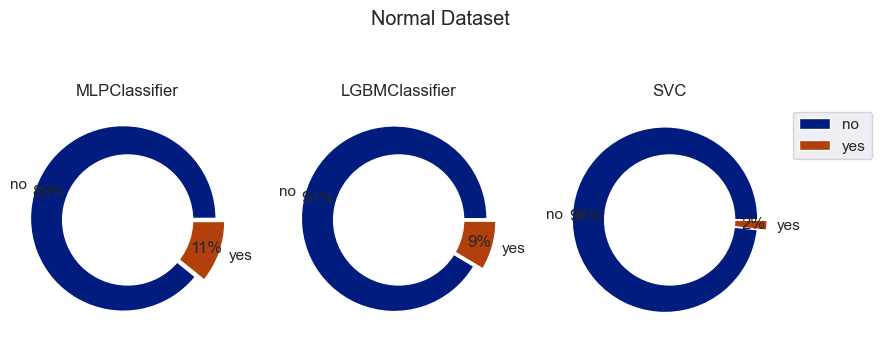

In [187]:
fig, axes = plt.subplots(1, 3, figsize=(9,4))
explode = (0.05, 0.05)

predictions = [mlp_pred, lgb_pred, svc_pred]
models = ['MLPClassifier', 'LGBMClassifier', 'SVC']

sns.set()
for ax, pred, model in zip(axes.ravel(), predictions, models):
    ax.pie(pd.Series(pred).value_counts(),
           labels=['no', 'yes'],
           colors=sns.color_palette('dark'),
           autopct='%.0f%%', pctdistance=0.85, 
           explode=explode)
    ax.set_title(model)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)

plt.legend(['no', 'yes'], loc='upper left', bbox_to_anchor=(1, 1))
fig.suptitle('Normal Dataset')
fig.tight_layout()
plt.show()

In [188]:
# Downsampled Dataset
mlp.fit(X_resampled, y_resampled)
lgb.fit(X_resampled, y_resampled)
svc.fit(X_resampled, y_resampled)

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC(C=10, gamma=1)

In [189]:
mlp_pred1 = mlp.predict(test)
lgb_pred1 = lgb.predict(test)
svc_pred1 = svc.predict(test)

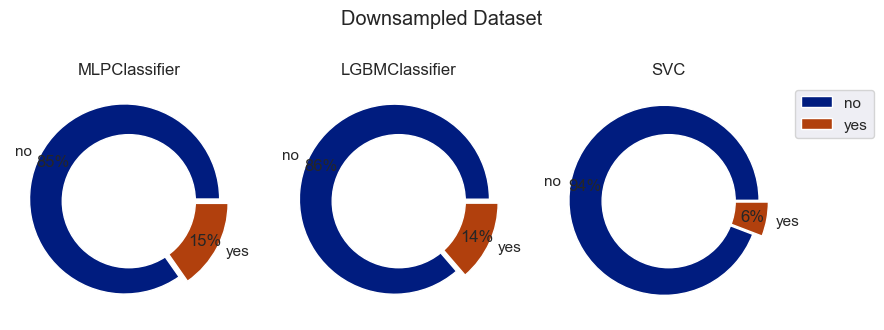

In [190]:
fig, axes = plt.subplots(1, 3, figsize=(9,4))
explode = (0.05, 0.05)

predictions = [mlp_pred1, lgb_pred1, svc_pred1]
models = ['MLPClassifier', 'LGBMClassifier', 'SVC']

sns.set()
for ax, pred, model in zip(axes.ravel(), predictions, models):
    ax.pie(pd.Series(pred).value_counts(),
           labels=['no', 'yes'],
           colors=sns.color_palette('dark'),
           autopct='%.0f%%', pctdistance=0.85, 
           explode=explode)
    ax.set_title(model)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)

plt.legend(['no', 'yes'], loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.suptitle('Downsampled Dataset')
plt.show()

In [191]:
# Oversampled Dataset
mlp.fit(X_resampled1, y_resampled1)
lgb.fit(X_resampled1, y_resampled1)
svc.fit(X_resampled1, y_resampled1)

SVC(C=10, gamma=1)

In [192]:
mlp_pred2 = mlp.predict(test)
lgb_pred2 = lgb.predict(test)
svc_pred2 = svc.predict(test)

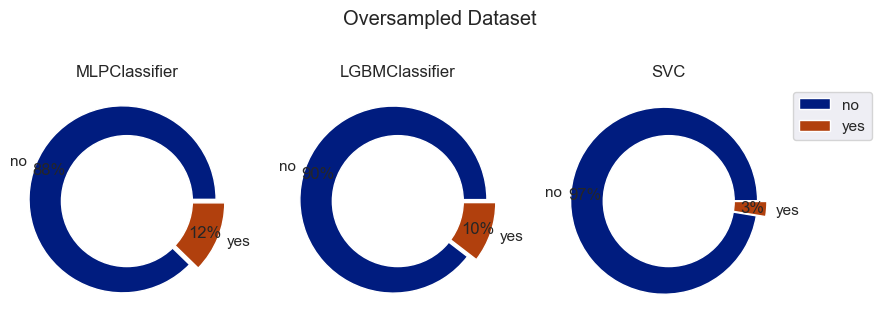

In [193]:
fig, axes = plt.subplots(1, 3, figsize=(9,4))
explode = (0.05, 0.05)

predictions = [mlp_pred2, lgb_pred2, svc_pred2]
models = ['MLPClassifier', 'LGBMClassifier', 'SVC']

sns.set()
for ax, pred, model in zip(axes.ravel(), predictions, models):
    ax.pie(pd.Series(pred).value_counts(),
           labels=['no', 'yes'],
           colors=sns.color_palette('dark'),
           autopct='%.0f%%', pctdistance=0.85, 
           explode=explode)
    ax.set_title(model)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)

plt.legend(['no', 'yes'], loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.suptitle('Oversampled Dataset')
plt.show()

MLP Predictions from the model trained on the oversampled dataset is closest to the Original Prediction range. We'll use that in the test set.

In [194]:
test = pd.DataFrame(test,
                    columns=preprocessor.get_feature_names_out())
test['target'] = mlp_pred2
test.head()

num__day  num__duration  num__age  num__accountBalance   
0 -1.297639       0.096558 -0.558093            -0.457293  \
1  0.264351      -0.577205 -0.934570            -0.281865   
2  1.586035       0.848665 -1.405166            -0.020363   
3 -1.297639      -0.193316 -1.405166            -0.125401   
4  0.264351       0.785990 -0.840451             0.917323   

   num__numberOfContacts  num__daySinceLastCampaign   
0              -0.566809                   3.173813  \
1              -0.566809                  -0.107770   
2              -0.248316                  -0.107770   
3               0.070177                  -0.107770   
4               0.070177                  -0.107770   

   num__numberOfContactsLastCampaign  cat__month_apr  cat__month_aug   
0                           4.516526             0.0             0.0  \
1                          -0.306099             0.0             0.0   
2                          -0.306099             0.0             0.0   
3                          -0.306099             0.0             0.0   
4                          -0.306099             0.0             0.0   

   cat__month_dec  ...  cat__contactType_landline  cat__contactType_unknown   
0             0.0  ...                        0.0                       0.0  \
1             0.0  ...                        0.0                       0.0   
2             0.0  ...                        1.0                       0.0   
3             0.0  ...                        0.0                       1.0   
4             0.0  ...                        0.0                       0.0   

   cat__lastCampaignResult_failure  cat__lastCampaignResult_other   
0                              1.0                            0.0  \
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   

   cat__lastCampaignResult_success  cat__lastCampaignResult_unknown   
0                              0.0                              0.0  \
1                              0.0                              1.0   
2                              0.0                              1.0   
3                              0.0                              1.0   
4                              0.0                              1.0   

   ord__creditFailure  ord__house  ord__credit  target  
0                 0.0         0.0          0.0       0  
1                 0.0         1.0          0.0       0  
2                 0.0         0.0          0.0       0  
3                 0.0         1.0          0.0       0  
4                 0.0         1.0          0.0       0  

[5 rows x 51 columns]

In [195]:
yes_profile = test.loc[test['target'] == 1]
yes_profile.head()

num__day  num__duration  num__age  num__accountBalance   
14 -0.817027       0.515701 -1.593404             0.188620  \
17 -0.096108      -0.287330 -0.463974             0.182420   
21 -0.817027       0.500032  0.665455            -0.399303   
26 -0.576720       0.163151  2.736076             0.693023   
44  0.744964      -0.592873 -1.499285            -0.482094   

    num__numberOfContacts  num__daySinceLastCampaign   
14              -0.566809                  -0.107770  \
17               0.707162                  -0.382873   
21              -0.248316                  -0.186371   
26              -0.248316                  -2.996349   
44              -0.248316                  -0.107770   

    num__numberOfContactsLastCampaign  cat__month_apr  cat__month_aug   
14                          -0.306099             0.0             0.0  \
17                           2.908984             0.0             0.0   
21                           1.301443             0.0             0.0   
26                           0.229749             0.0             0.0   
44                          -0.306099             1.0             0.0   

    cat__month_dec  ...  cat__contactType_landline  cat__contactType_unknown   
14             1.0  ...                        0.0                       0.0  \
17             0.0  ...                        0.0                       0.0   
21             0.0  ...                        0.0                       0.0   
26             0.0  ...                        0.0                       0.0   
44             0.0  ...                        0.0                       0.0   

    cat__lastCampaignResult_failure  cat__lastCampaignResult_other   
14                              0.0                            0.0  \
17                              1.0                            0.0   
21                              0.0                            0.0   
26                              1.0                            0.0   
44                              0.0                            0.0   

    cat__lastCampaignResult_success  cat__lastCampaignResult_unknown   
14                              0.0                              1.0  \
17                              0.0                              0.0   
21                              1.0                              0.0   
26                              0.0                              0.0   
44                              0.0                              1.0   

    ord__creditFailure  ord__house  ord__credit  target  
14                 0.0         0.0          0.0       1  
17                 0.0         0.0          0.0       1  
21                 0.0         0.0          0.0       1  
26                 0.0         0.0          0.0       1  
44                 0.0         0.0          0.0       1  

[5 rows x 51 columns]

In [196]:
yes_profile.shape[0]

1685

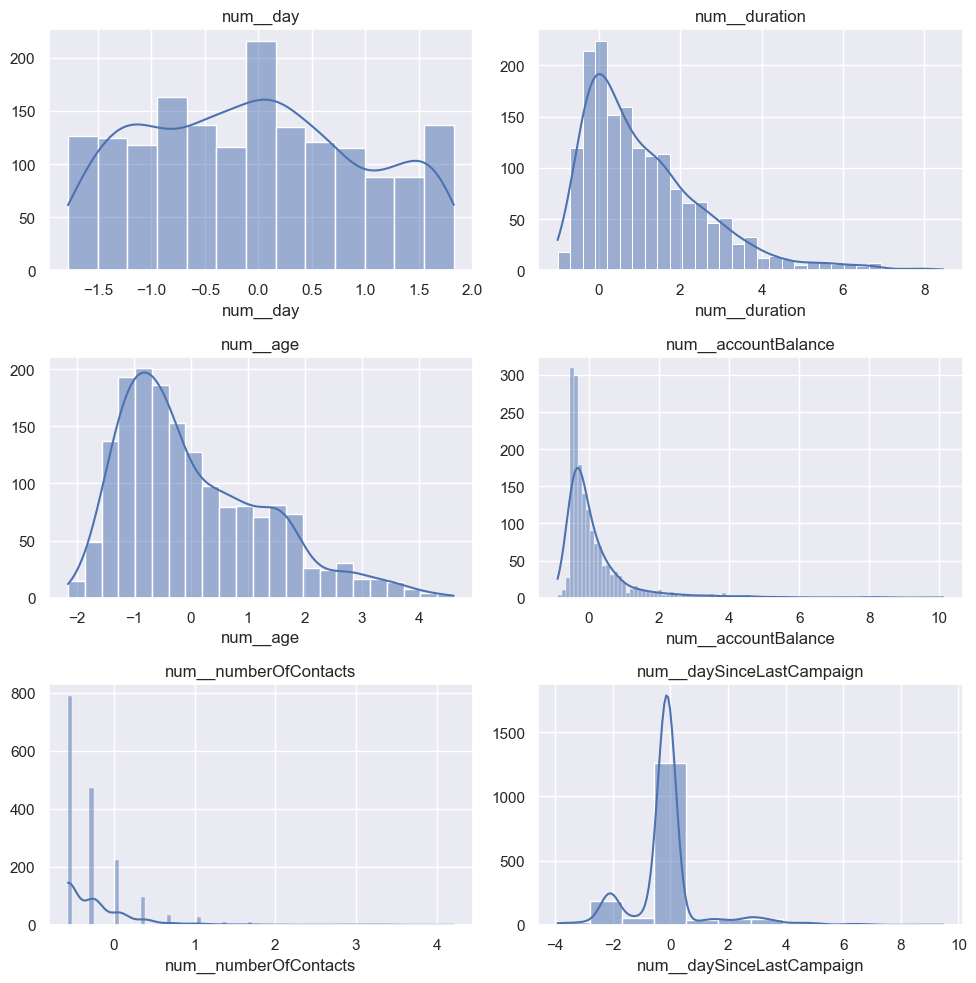

In [197]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
for ax, col in zip(axes.ravel(), yes_profile.columns[:7]):
    sns.histplot(yes_profile[col], kde=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

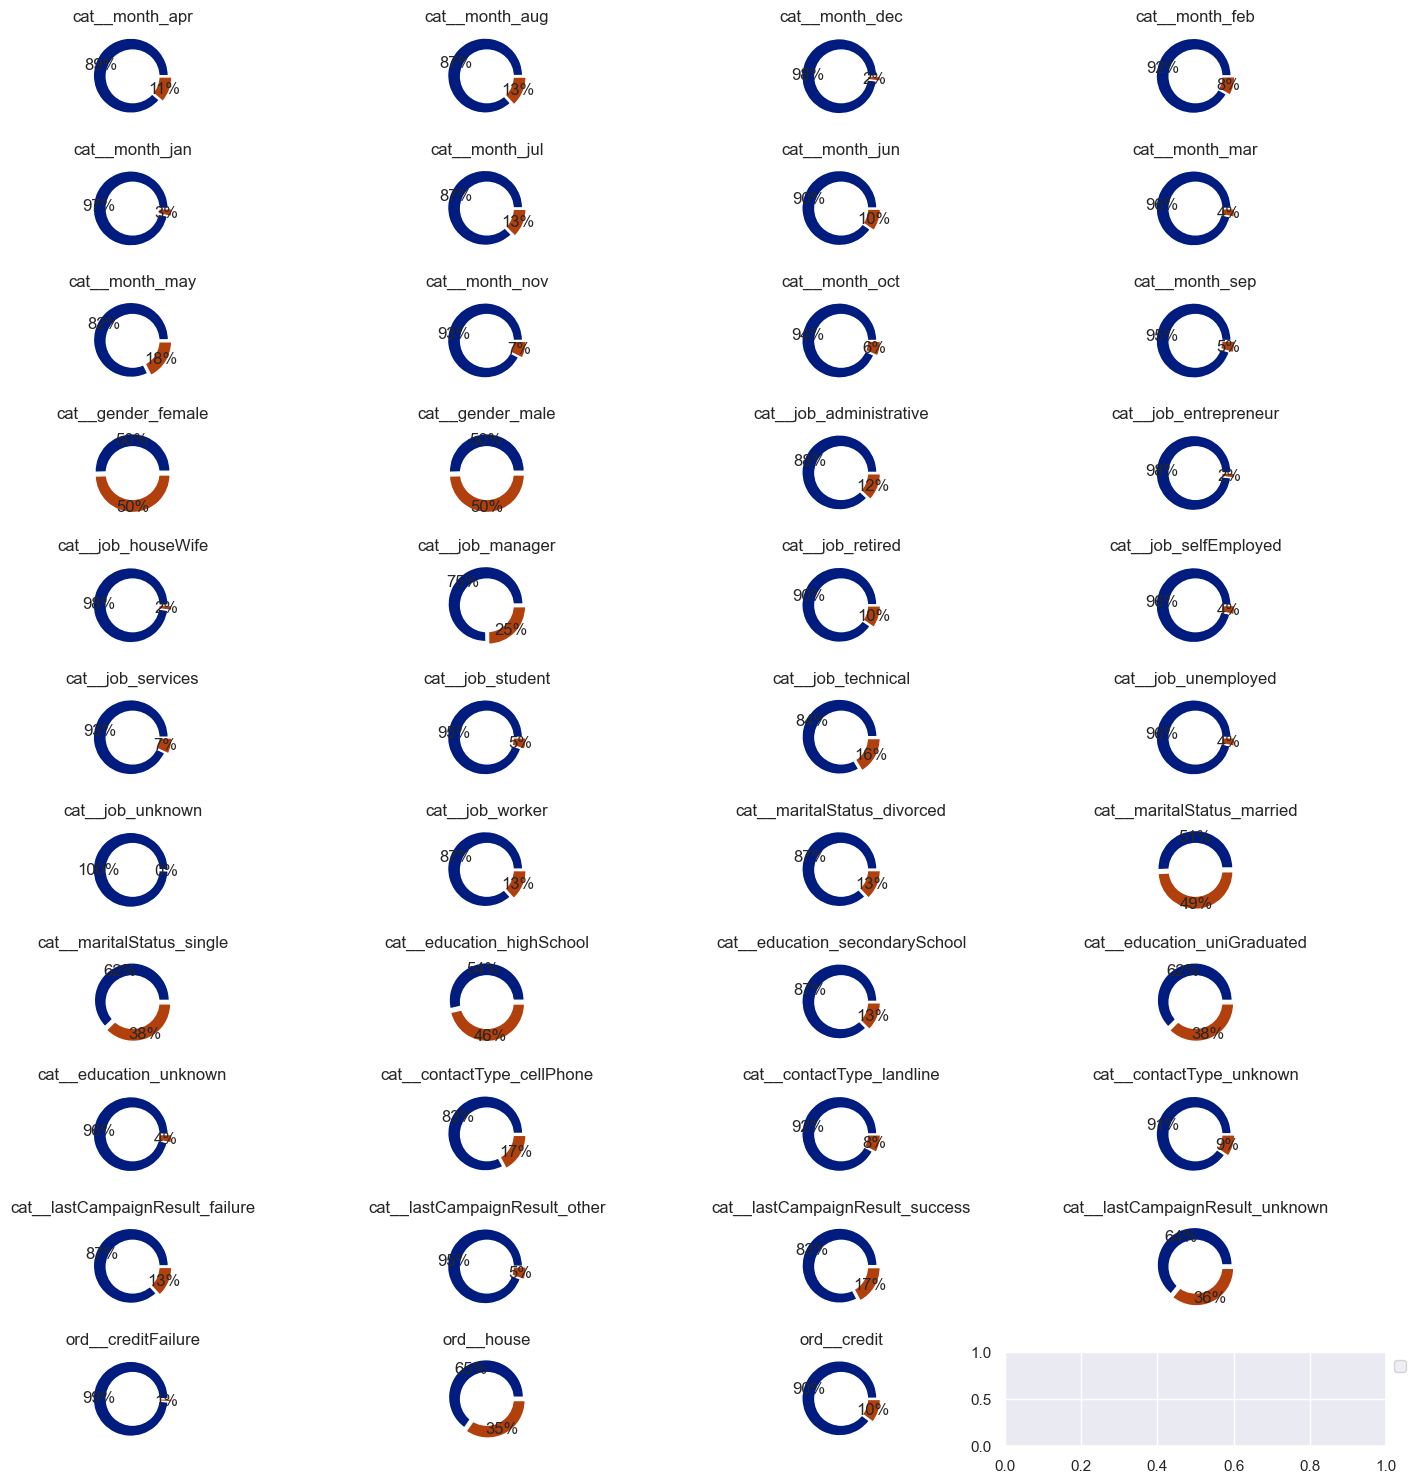

In [198]:
explode = (0.05, 0.05)

sns.set()
fig, axes = plt.subplots(11, 4, figsize=(15,15))
for ax, col in zip(axes.ravel(), yes_profile.columns[7:-1]):
    ax.pie(yes_profile[col].value_counts(),
           colors=sns.color_palette('dark'),
           autopct='%.0f%%', pctdistance=0.85, 
           explode=explode)
    ax.set_title(col)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')

    ax.add_artist(centre_circle)

plt.legend(['no', 'yes'], loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()